<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Josefa Anselmo.
- Nombre de alumno 2: Tamara Carrasco.


### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025/tree/main)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

In [1]:
# Por mucho problema con compatibilidad de librería tuve que agregar esto para  que corriera por alibi básicamente que sigue siendo parte de pycaret,
# librería que ya no mantienen por lo que nos comentaron en clases....

!pip install --quiet --no-cache-dir --no-deps \
    numpy==1.26.4 pandas==2.1.4 scipy==1.11.4 \
    matplotlib==3.7.5 seaborn plotly \
    scikit-learn==1.3.2 imbalanced-learn==0.11.0 \
    xgboost==1.7.6 lightgbm==4.0.0 catboost==1.2.5 \
    pycaret==3.3.2 shap lime alibi \
    jupyterlab notebook umap-learn==0.5.5



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install --upgrade --force-reinstall --no-cache-dir --quiet \
   numpy pandas scikit-learn scipy matplotlib seaborn \
   xgboost lightgbm catboost \
   imbalanced-learn pycaret umap-learn \
   shap lime alibi plotly plotnine xarray \
   Pillow pytz tzdata pyparsing cycler joblib packaging

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.4.9 requires async-lru>=1.0.0, which is not installed.
jupyterlab 4.4.9 requires httpx<1,>=0.25.0, which is not installed.
jupyterlab 4.4.9 requires jupyter-lsp>=2.0.0, which is not installed.
jupyterlab 4.4.9 requires jupyter-server<3,>=2.4.0, which is not installed.
jupyterlab 4.4.9 requires jupyterlab-server<3,>=2.27.1, which is not installed.
jupyterlab 4.4.9 requires notebook-shim>=0.2, which is not installed.
notebook 7.4.7 requires jupyter-server<3,>=2.4.0, which is not installed.
notebook 7.4.7 requires jupyterlab-server<3,>=2.27.1, which is not installed.
notebook 7.4.7 requires notebook-shim<0.3,>=0.2, which is not installed.
ray 2.50.0 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.

[notice] A new release of pip is available

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [89]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [67]:
!pip install xgboost


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [68]:
# Inserte su código aquí

### importación de librerías importantes

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Holdout 
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

# Modelo
import xgboost as xgb
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import classification_report

In [90]:
## Exploración de los datos

# Dimensión
print(" Dimensiones del dataset: ", df.shape)

# Columnas
print("="*40)
print("Columnas numéricas: \n", df.select_dtypes(include="number").columns.tolist())
print("\n Columnas tipo category u object: ", df.select_dtypes(include=[
    "object", "category"
                        ]
                ).columns.tolist()
    )

# Valores duplicados
print("="*40)
print(" Valores duplicados en todas las columnas: ", df.duplicated().sum())

# Valores nulos
print("="*40)
print(df.info())

# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas:")
df.describe()

# Conteo de valores únicos por columna (útil para detectar categóricas)
print("\nValores únicos por columna:")
df.nunique()

 Dimensiones del dataset:  (70692, 18)
Columnas numéricas: 
 ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

 Columnas tipo category u object:  []
 Valores duplicados en todas las columnas:  6672
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits   

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [91]:
# Elimino registros duplicados

df = df.drop_duplicates()

print(f"Total de filas finales: {df.shape}")

Total de filas finales: (64020, 18)


In [92]:
## ¿Hay desbalance de clases?
df["Diabetes"].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

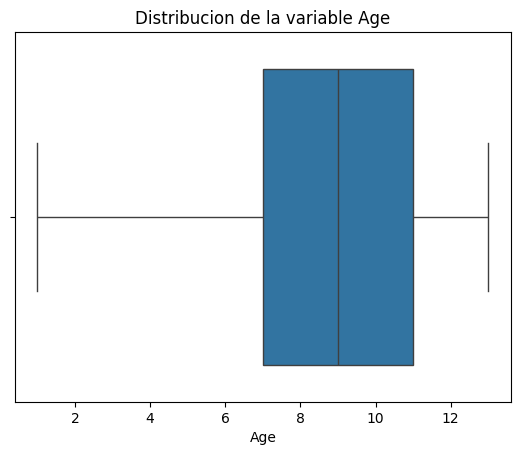

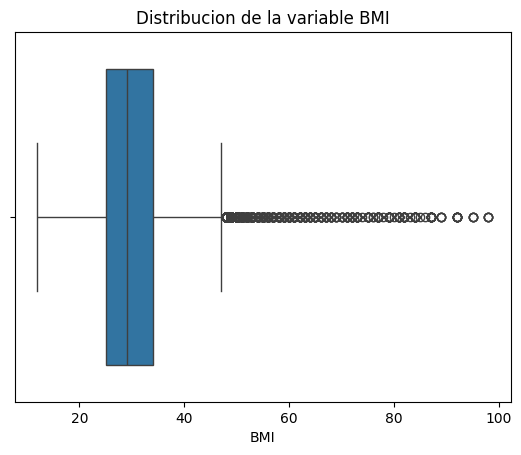

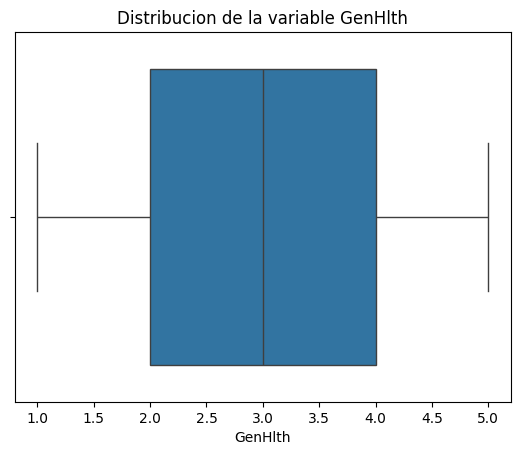

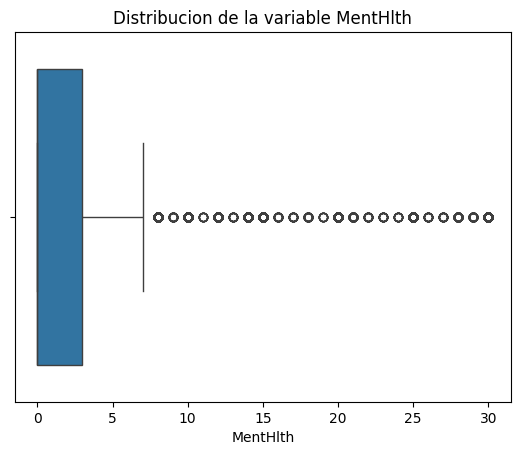

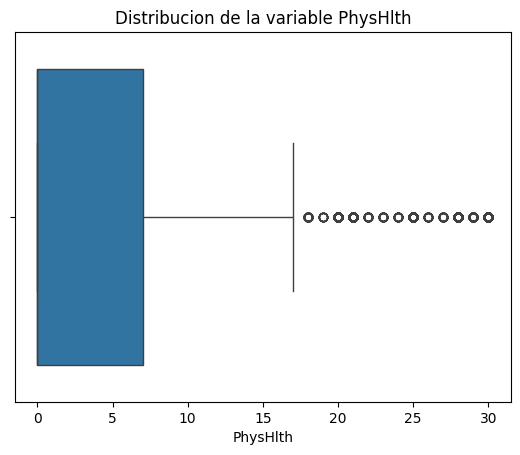

In [93]:
# Columnas binarias

binarias = ['Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'DiffWalk',
 'Stroke',
 'HighBP',
 'Diabetes']

num_cols = ['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']


for i in num_cols:
    plt.figure()
    plt.clf()
    plt.title(f"Distribucion de la variable {i}")
    plt.xlabel(f"{i}")
    sns.boxplot(data=df, x=i)
    plt.show()

In [94]:
# Variables binarias tabla

binarias_ok = [c for c in binarias if c in df.columns]

# Crear tabla con cantidad de 0 y 1
tabla_bin = (
    df[binarias_ok]
    .apply(lambda s: s.value_counts())
    .T
    .fillna(0)
    .astype(int)
    .rename(columns={0: "n_0", 1: "n_1"})
)

# Totales y proporción de 1
tabla_bin["n_total"] = tabla_bin["n_0"] + tabla_bin["n_1"]
tabla_bin["pct_1"] = (tabla_bin["n_1"] / tabla_bin["n_total"]).round(3)

# Ordenar por proporción de 1
tabla_bin = tabla_bin.sort_values("pct_1", ascending=False)

# resultados
tabla_bin

,n_0,n_1,n_total,pct_1
CholCheck,1715,62305,64020,0.973
Veggies,14623,49397,64020,0.772
PhysActivity,20591,43429,64020,0.678
Fruits,26193,37827,64020,0.591
HighBP,26776,37244,64020,0.582
HighChol,29478,34542,64020,0.540
Diabetes,30622,33398,64020,0.522
Smoker,32605,31415,64020,0.491
Sex,34828,29192,64020,0.456
DiffWalk,46286,17734,64020,0.277


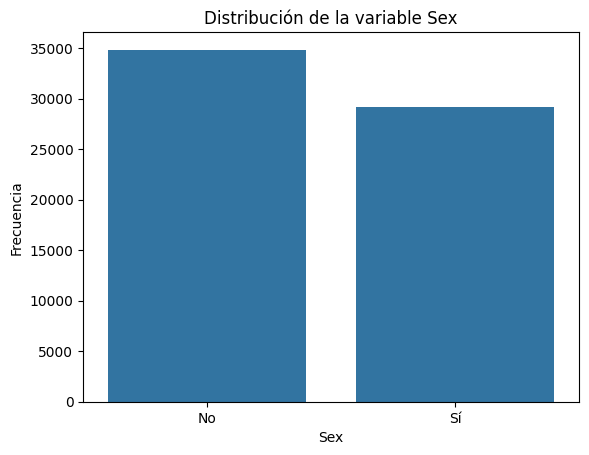

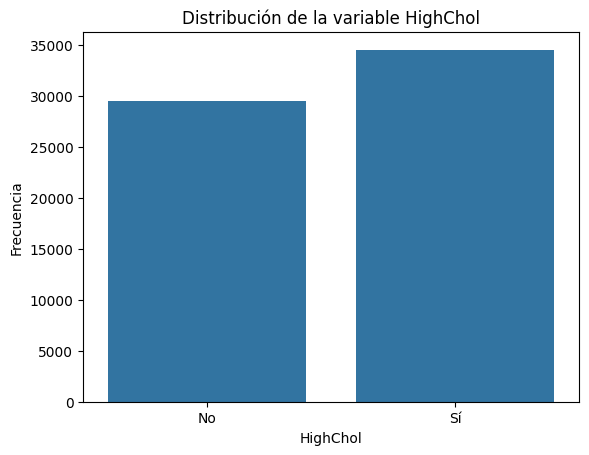

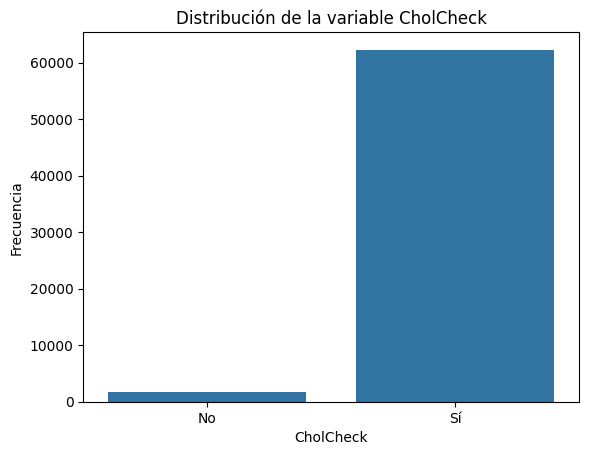

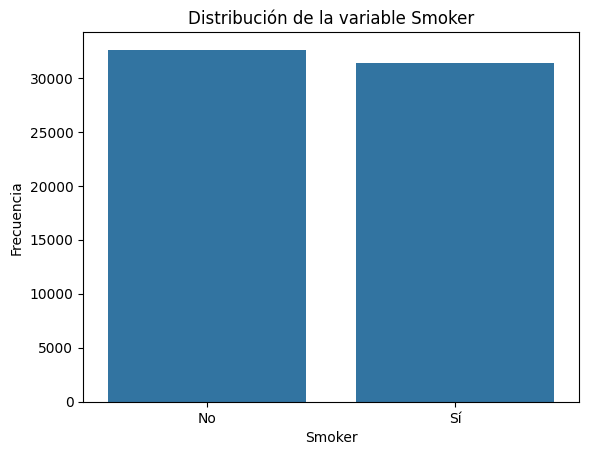

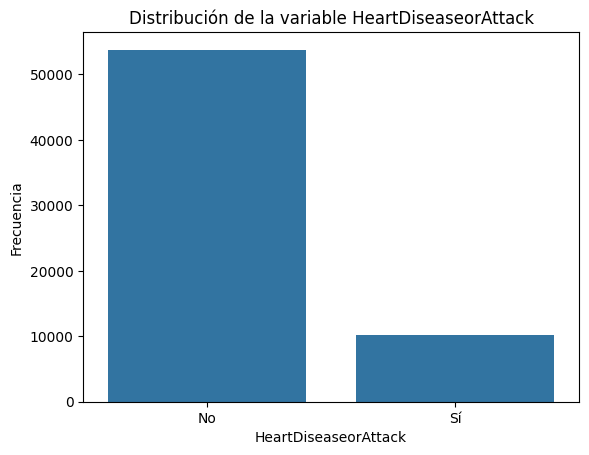

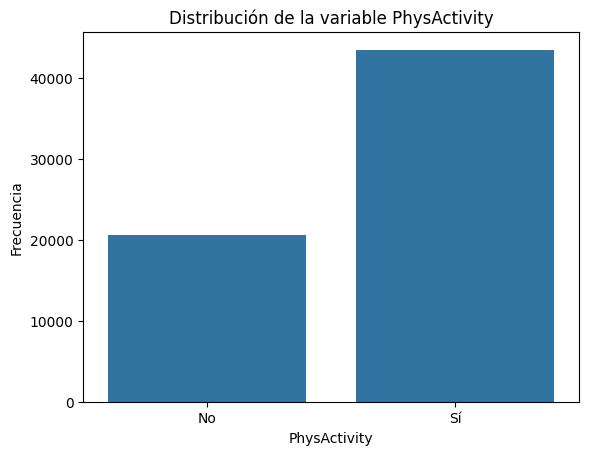

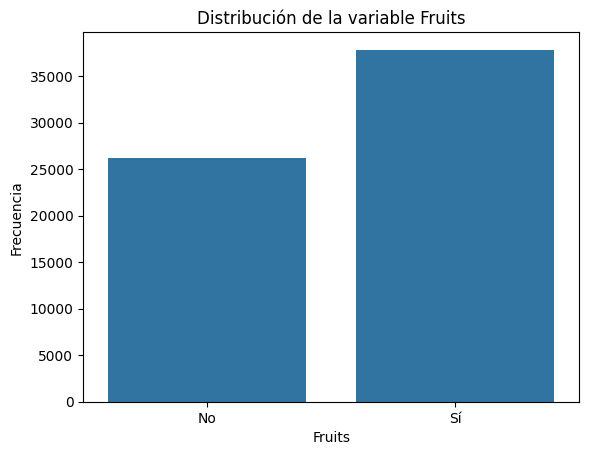

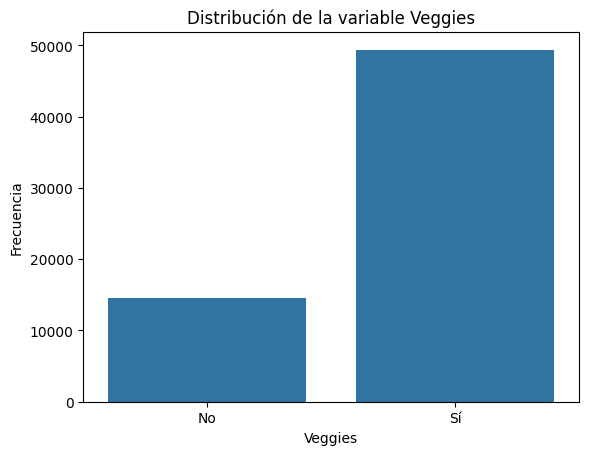

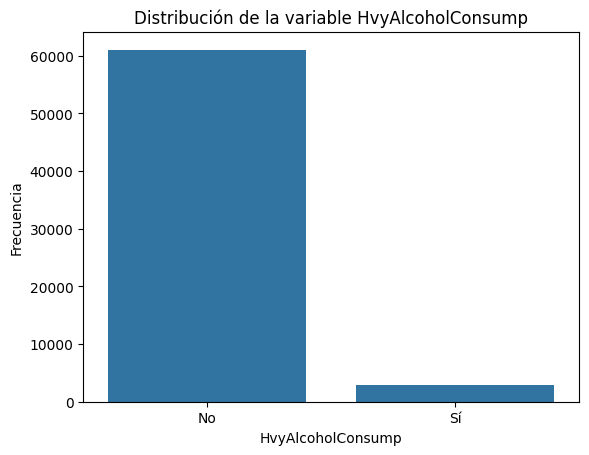

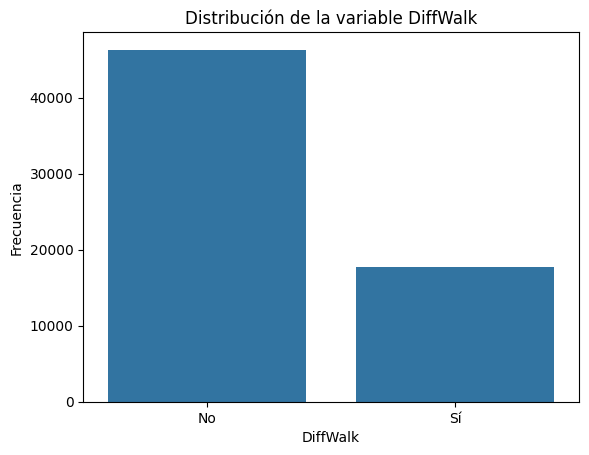

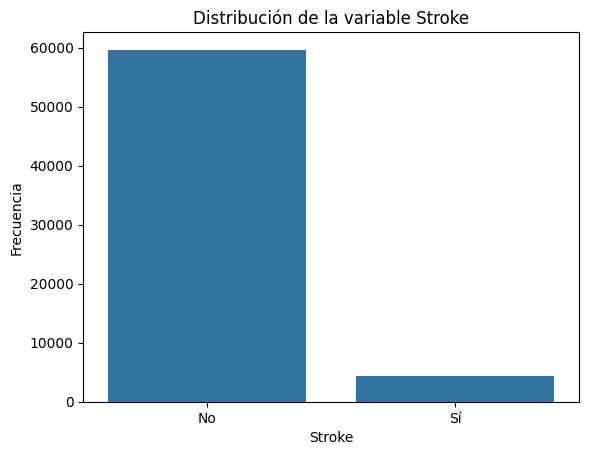

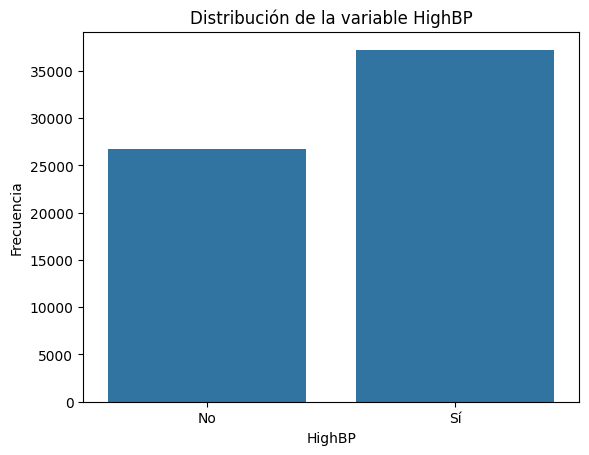

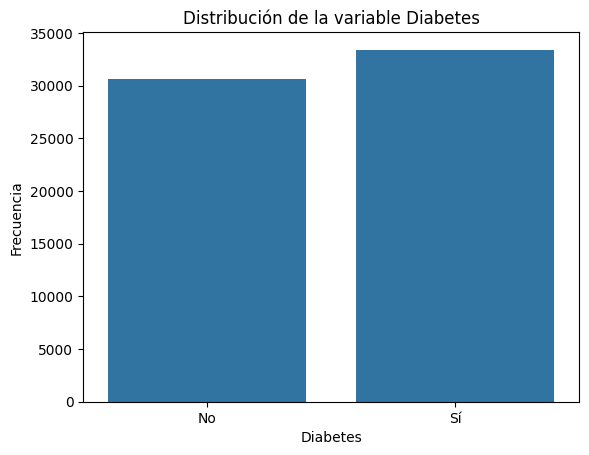

In [95]:
# Variables binarias plot

for col in binarias:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de la variable {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks([0, 1], ["No", "Sí"])
    plt.show()

                variable        VIF
3              CholCheck  23.315805
4                    BMI  16.271293
11               GenHlth  13.301412
0                    Age  11.370191
9                Veggies   4.543031
7           PhysActivity   3.323853
16                HighBP   3.152070
17              Diabetes   2.819976
8                 Fruits   2.630581
2               HighChol   2.533812
13              PhysHlth   2.271169
14              DiffWalk   2.087986
5                 Smoker   2.069704
1                    Sex   1.915425
12              MentHlth   1.513372
6   HeartDiseaseorAttack   1.407847
15                Stroke   1.168535
10     HvyAlcoholConsump   1.072284


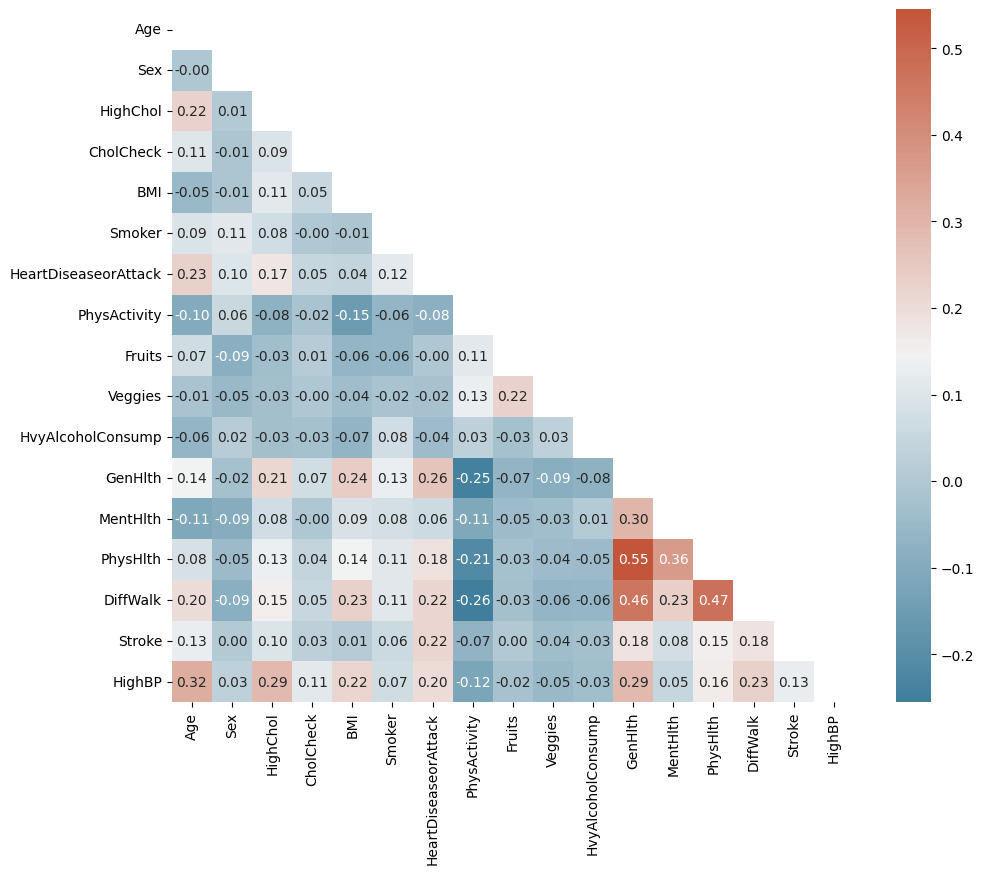

In [98]:
# Heatmap

corr = df.select_dtypes(include="number").drop(columns=
                                                    [
                                                    "Diabetes"
                                                    ]
                                                    ).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Figura
figure, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f")

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Subconjunto de variables numéricas (sin el target)
X_vif = df

vif = pd.DataFrame()
vif["variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif.sort_values("VIF", ascending=False))



In [99]:
## PUNTO 2: creación de los dataset de entrenamiento y prueba.

df_x = df.drop(columns="Diabetes").copy()
df_y = df["Diabetes"]

# hay un desbalance leve pero igual usaremos stratify.

X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, random_state=42, test_size=0.33, shuffle=True, stratify=df_y
)

In [115]:
# PUNTO 3: Creación de condiciones + column transformer:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, RobustScaler

# Custom Winsorizer (aprende p1/p99 en fit para evitar leakage)
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, p_low=0.01, p_high=0.99):
        self.p_low = p_low
        self.p_high = p_high

    def fit(self, X, y=None):
        self._was_df_ = hasattr(X, "iloc")
        if self._was_df_:
            self._cols_ = list(X.columns)
            self._index_ = X.index 

        X_arr = np.asarray(X, dtype=float)
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)

        self.low_  = np.nanpercentile(X_arr, self.p_low  * 100, axis=0)
        self.high_ = np.nanpercentile(X_arr, self.p_high * 100, axis=0)
        return self

    def transform(self, X):
        was_df = hasattr(X, "iloc")
        idx = X.index if was_df else None
        cols = list(X.columns) if was_df else None

        X_arr = np.asarray(X, dtype=float)
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)

        X_clip = np.clip(X_arr, self.low_, self.high_)

        if was_df:
            return pd.DataFrame(X_clip, index=idx, columns=cols)
        return X_clip

    def set_output(self, *, transform=None):
        return self
    
    def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            import numpy as np
            return np.asarray(input_features, dtype=object)
        return np.asarray(getattr(self, "_cols_", ["BMI"]), dtype=object)

# Listas según las decisiones definidas antes
binarias = [
    "Sex","HighChol","Smoker","HeartDiseaseorAttack","PhysActivity",
    "Fruits","Veggies","HvyAlcoholConsump","DiffWalk","Stroke","HighBP"
]
# No usamos GenHlth; tampoco CholCheck por lo que se epxlico
ordinales = ["Age"]
bmi_col   = ["BMI"]
ment_phys = ["MentHlth","PhysHlth"]

# Pipelines por rama de BMI y de Ment y Phys
bmi_pipe = Pipeline([
    ("winsor", Winsorizer(0.01, 0.99)),
    ("scale",  RobustScaler())
])

ment_phys_pipe = Pipeline([
    ("log1p",  FunctionTransformer(np.log1p, validate=False)),
    ("scale",  RobustScaler())
])

# ColumnTransformer considerando todo lo definido
col_transformer = ColumnTransformer(
    transformers=[
        ("bmi",        bmi_pipe,       bmi_col),       # BMI: winsor + robust
        ("ment_phys",  ment_phys_pipe, ment_phys),     # Ment/Phys: log1p + robust
        ("pass_bin",   "passthrough",  binarias),      # binarios los dejamos sin escalar
        ("pass_age",   "passthrough",  ordinales),     # Age queda sin escalar -> estoy lo otro pq preferimos la interpetabilidad
    ],
    remainder="drop",                 # descarta CholCheck, GenHlth y cualquier otra no listada por lo que definimos antes en base al analisis exploratorio
    verbose_feature_names_out=False
).set_output(transform="pandas")

In [116]:
# PUNTO 4: Pipeline del modelo

from sklearn.metrics import classification_report
from xgboost import XGBClassifier


# Modelo XGBoost coherente y estable
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",      
    random_state=7734,
    n_jobs=-1
)

# Pipeline final del preprocesamiento considerando el col_transformer + modelo definido de xgb
xgb_pipeline = Pipeline(
    steps=[
        ("pre", col_transformer),
        ("xgb", xgb)
    ]
)

# Entrenamiento
xgb_pipeline.fit(X_train, y_train)

# Predicciones
y_pred_tr = xgb_pipeline.predict(X_train)
y_pred_te = xgb_pipeline.predict(X_test)

# Reportes
print("=== Métricas en TRAIN ===")
print(classification_report(y_train, y_pred_tr, digits=3))

print("\n=== Métricas en TEST ===")
print(classification_report(y_test, y_pred_te, digits=3))

=== Métricas en TRAIN ===
              precision    recall  f1-score   support

         0.0      0.770     0.700     0.733     20517
         1.0      0.746     0.809     0.776     22376

    accuracy                          0.757     42893
   macro avg      0.758     0.754     0.755     42893
weighted avg      0.758     0.757     0.756     42893


=== Métricas en TEST ===
              precision    recall  f1-score   support

         0.0      0.725     0.662     0.692     10105
         1.0      0.713     0.770     0.740     11022

    accuracy                          0.718     21127
   macro avg      0.719     0.716     0.716     21127
weighted avg      0.719     0.718     0.717     21127



**COMENTARIOS PUNTO 1**

**DECISIONES**

En esta etapa del preprocesamiento se eliminaron y ajustaron variables siguiendo criterios técnicos y estadísticos:

Durante la etapa de exploración inicial del conjunto de datos, se realizó un análisis descriptivo y gráfico con el objetivo de comprender la estructura y las características de las variables antes de aplicar cualquier modelo.

En primer lugar, se verificó que la dimensión del dataset (70692, 18), donde no existen valores nulos pero si varios duplicados (6672 dropeados con nuevas dimensiones igual a (64020, 18)) por lo que eliminaremos los registros duplicados. Luego se revisaron los tipos de datos y todas las variables aparecían como `float64`, cuando la mayoría correspondía a variables binarias (0/1) que no necesariamente representaban un número float. Estas fueron tipificadas a enteros para evitar decimales y asegurar una correcta interpretación por parte del modelo (manteniendo también el orden).

Posteriormente, se generaron estadísticas descriptivas y distribuciones. Se observó que las variables binarias (como `HighBP`, `Smoker`, `PhysActivity`, etc.) presentaban proporciones razonablemente balanceadas, con excepción de `CholCheck`, que mostraba un valor de 1 en el 97 % de los casos, evidenciando una baja variabilidad y justificando su exclusión.

Las variables continuas (`BMI`, `MentHlth`, `PhysHlth`) mostraron colas largas y presencia de outliers, particularmente en `BMI`. Se aplicó winsorización (1 %) sobre `BMI` para atenuar el impacto de valores extremos y se realizaron transformaciones logarítmicas (`np.log1p`) sobre `MentHlth` y `PhysHlth` para suavizar su asimetría.

Asimismo, se analizó la correlación entre variables mediante una matriz de calor y el cálculo del VIF (Variance Inflation Factor). Esto permitió detectar colinealidades altas en `GenHlth` y `CholCheck`, que fueron descartadas por redundancia. El resto de variables mostró VIF inferiores a 5, lo que confirma una baja redundancia entre predictores.

Verificamos el balance de clases en la variable objetivo `Diabetes`, observándose una distribución equilibrada (~52 % positivos y ~48 % negativos). En conjunto, esta exploración permitió definir un conjunto de predictores limpios, sin colinealidad severa, con escalado robusto en las variables continuas y adecuadamente preparados para el entrenamiento del modelo `XGBoost`.

**Justificaciones particulares de las decisiones**

1. *Eliminación de CholCheck:*
Esta variable presentaba un nivel de homogeneidad extremo (97,3 % de observaciones con valor = 1), lo que implica una baja varianza y nulo poder predictivo. Además, generaba un VIF ≈ 24, evidenciando colinealidad redundante con otras variables de salud general. Mantenerla solo añadiría ruido sin aportar información al modelo, por lo que se eliminó del conjunto de entrenamiento.

2. *Windsorizacion de BMI:*
El índice de masa corporal mostraba múltiples valores atípicos en los percentiles superiores (outliers > 50). Para mitigar su impacto sin alterar la estructura de la variable, se aplicó una winsorización leve (1 %), generando BMI_winsor. Esta versión conserva la distribución central del indicador, pero reduce la influencia de observaciones extremas en los splits de XGBoost.

3. *Transformaciones logarítmicas en MentHlth y PhysHlth:*
Ambas variables (días de mala salud mental/física) presentan una distribución fuertemente sesgada hacia 0, con una larga cola hasta 30 días. Se aplicó np.log1p() para estabilizar la varianza y suavizar la asimetría, permitiendo que el modelo distinga mejor entre niveles moderados y altos de afectación sin sobreponderar los valores extremos.

4. *Exclusión de GenHlth por redundancia conceptual:*
GenHlth sintetiza el estado de salud general percibido y mostró alta colinealidad con MentHlth_log, PhysHlth_log, DiffWalk y HighBP (VIF ≈ 13). Dado que estas últimas capturan componentes específicos y medibles del bienestar, se privilegió su inclusión directa, eliminando GenHlth para evitar duplicidad de información y mejorar la interpretabilidad del modelo.

**RESULTADOS**

- *Desempeño general*: El modelo alcanza un accuracy 0.718 en TEST (0.757 en TRAIN), con un F1 de la clase 1 = 0.740 en TEST (0.776 en TRAIN). La caída moderada entre TRAIN y TEST sugiere sobreajuste leve, pero generaliza razonablemente.

- *Clase positiva (diabetes):* En TEST, entrega un recall = 0.770 y una precision = 0.713. Es decir, el modelo detecta ~77% de los casos con diabetes, a costa de que ~29% de los positivos predichos sean falsos positivos. Para un contexto de screening, este equilibrio es aceptable y puede ajustarse según el costo clínico de los errores.

- *Clase negativa:* En TEST, la clase 0 tiene un recall = 0.662, lo que refleja que el modelo tiende a ser más sensible (privilegia capturar positivos) y sacrifica algo de especificidad (más falsos positivos).

- *Macro/weighted:* Los promedios macro y ponderado ~0.716–0.719 confirman un rendimiento parejo entre clases (el dataset está casi balanceado), aunque la prioridad clínica podría llevarnos a optimizar el umbral para elevar aún más el recall de la clase 1.

- *Siguiente paso recomendado:* Ajustar el umbral de decisión con la curva Precision–Recall para fijar un recall objetivo (p. ej., ≥0.80–0.85 si la meta es minimizar falsos negativos) y re-reportar precision/recall/F1 en ese umbral; complementar con importancias/SHAP para justificar variables dominantes.


### Respuesta a las preguntas de análisis.
1. *¿Es acaso un buen predictor de diabetes?*

    **R:** Sí, es razonablemente bueno, con leve sobreajuste y margen de mejora en recall. Podemos ver que en TRAIN el modelo logra accuracy 0.757 y, para la clase positiva, precision/recall/F1 = 0.746 / 0.809 / 0.776. En TEST obtiene accuracy 0.718 y, para la clase positiva, precision/recall/F1 = 0.713 / 0.770 / 0.740. La caída moderada de desempeño entre TRAIN y TEST indica sobreajuste leve, pero el modelo generaliza razonablemente (brecha acotada).Dado que el set está casi balanceado (TEST: 10.105 “0” vs 11.022 “1”), accuracy es informativo pero no suficiente en un problema de salud. Para screening interesa especialmente el recall de la clase 1 (evitar falsos negativos). El modelo alcanza recall=0.77 en TEST (detecta ~77% de casos con diabetes), con precision=0.713 (alrededor del 29% de los positivos predichos no tendrían la condición). Entonces, este modelo es un buen punto de partida, útil para priorización/derivación, pero podría ajustarse el umbral para elevar el recall si la política clínica lo requiere, asumiendo más falsos positivos.

2. *¿Qué buscan explicar las métricas utilizadas?*

    **R:** 
    - *Precision (clase 1):* de los casos que el modelo predijo como “diabetes”, qué proporción realmente lo es (controla falsos positivos).
    - *Recall/Sensibilidad (clase 1):* de los casos que sí tenían diabetes, qué proporción detecta el modelo (controla falsos negativos).
    - *F1 (clase 1):* promedio armónico entre precision y recall; resume el trade-off cuando ambas importan.
    - *Accuracy:* proporción total de aciertos; con clases cercanas a 50/50 aporta contexto, pero no captura bien el costo asimétrico de errores.
    - *Macro avg:* promedio simple entre clases (trata por igual a 0 y 1).
    - *Weighted avg:* promedio ponderado por soporte (se acerca al comportamiento global observando el tamaño de cada clase).

3. *¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?*

    **R:** No. Las métricas reportadas evalúan el rendimiento predictivo global del modelo, pero no informan sobre la calidad ni la necesidad de cada feature. Para juzgar la contribución de las variables se requieren análisis adicionales, como por ejemplo estimar importancias por ganancia en XGBoost y, para mayor robustez fuera de muestra, usar permutation importance; complementar con explicaciones locales y globales (SHAP) para identificar qué atributos empujan cada predicción hacia 1 o 0; realizar pruebas de ablación (quitar/añadir variables) y validar la estabilidad de resultados en validación cruzada; y controlar colinealidad, podando variables con ganancia cercana a cero. Como recomendación práctica, conviene calibrar el umbral mediante la curva Precision–Recall para fijar un objetivo de recall (por ejemplo, ≥0.85 si se prioriza minimizar falsos negativos) y, en ese nuevo umbral, volver a reportar precision/recall/F1 y revisar importancias/SHAP para justificar clínicamente las variables dominantes.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

,feature,importance
13,HighBP,69.712059
4,HighChol,15.570233
11,DiffWalk,14.568638
6,HeartDiseaseorAttack,8.129115
0,BMI,7.011868
14,Age,6.775051
10,HvyAlcoholConsump,6.708278
12,Stroke,3.564064
3,Sex,3.501861
2,PhysHlth,3.233873


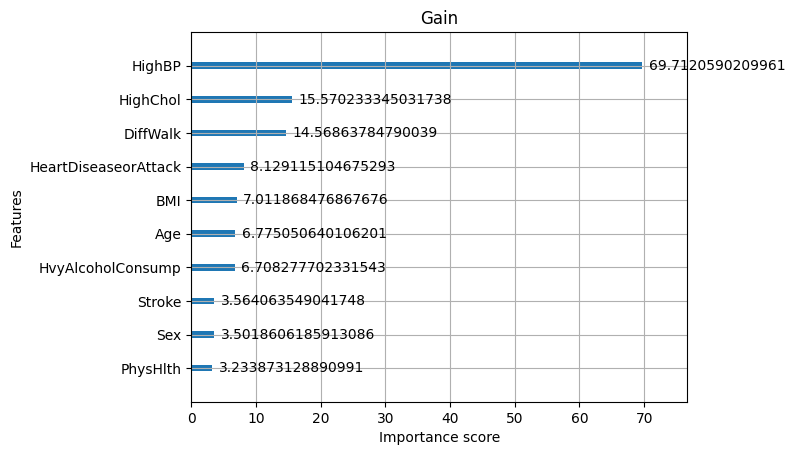

,feature,importance
0,BMI,4769.0
14,Age,3596.0
2,PhysHlth,3355.0
1,MentHlth,3041.0
5,Smoker,891.0
3,Sex,881.0
8,Fruits,848.0
4,HighChol,805.0
7,PhysActivity,801.0
9,Veggies,764.0


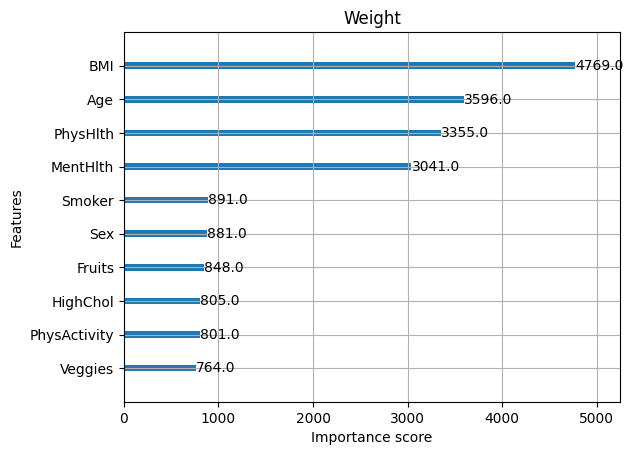

,feature,importance
10,HvyAlcoholConsump,1067.794312
0,BMI,946.021912
13,HighBP,945.336792
12,Stroke,920.392700
4,HighChol,886.169556
6,HeartDiseaseorAttack,806.707031
14,Age,772.053894
1,MentHlth,716.410156
2,PhysHlth,702.745667
11,DiffWalk,647.983093


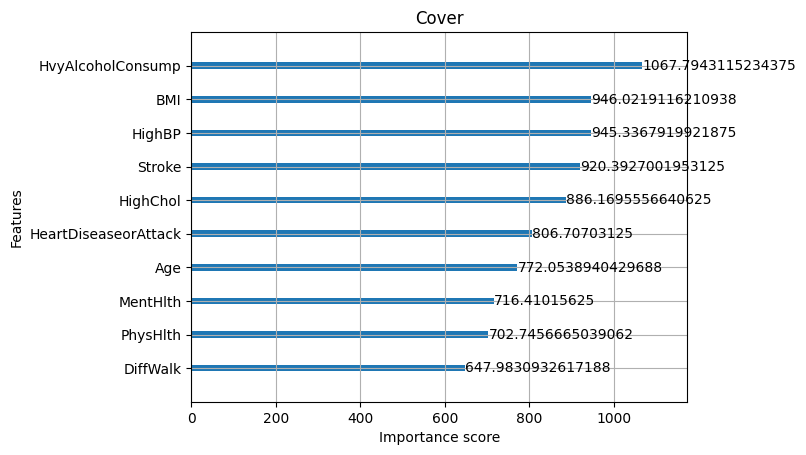

In [ ]:
# Inserte su código aquí
import xgboost as xgb # Vuelvo a descarga popr choque de nombre con una definicon al momento de definir mi modelo

####  PUNTO 1

pre   = xgb_pipeline.named_steps["pre"]
model = xgb_pipeline.named_steps["xgb"]

Xt = pre.transform(X_train)          
feature_names = Xt.columns.tolist()

booster = model.get_booster()
booster.feature_names = feature_names

#Graficos

# GAIN
imp_gain = booster.get_score(importance_type="gain")
imp_gain_df = (pd.DataFrame.from_dict(imp_gain, orient="index", columns=["importance"])
               .rename_axis("feature").reset_index()
               .sort_values("importance", ascending=False))
display(imp_gain_df.head(10))
xgb.plot_importance(booster, importance_type="gain", max_num_features=10); plt.title("Gain"); plt.show()

# WEIGHT
imp_weight = booster.get_score(importance_type="weight")
imp_weight_df = (pd.DataFrame.from_dict(imp_weight, orient="index", columns=["importance"])
                 .rename_axis("feature").reset_index()
                 .sort_values("importance", ascending=False))
display(imp_weight_df.head(10))
xgb.plot_importance(booster, importance_type="weight", max_num_features=10); plt.title("Weight"); plt.show()

# COVER
imp_cover = booster.get_score(importance_type="cover")
imp_cover_df = (pd.DataFrame.from_dict(imp_cover, orient="index", columns=["importance"])
                .rename_axis("feature").reset_index()
                .sort_values("importance", ascending=False))
display(imp_cover_df.head(10))
xgb.plot_importance(booster, importance_type="cover", max_num_features=10); plt.title("Cover"); plt.show()


### Respuestas a las preguntas de análisis.

2. *¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.*

    **R:** Sí hay coherencia general entre los tres métodos, pero no son idénticos porque miden cosas distintas. En el modelo definido, “gain” señala a HighBP como la variable más determinante pues es la que, cuando aparece en los splits, más reduce la pérdida en promedio; detrás quedan HighChol, DiffWalk, HeartDiseaseorAttack, BMI y Age. En cambio, cuando graficamos por “weight” este prioriza a BMI y Age, seguidas por PhysHlth y MentHlth, porque cuentan cuántas veces se usan en divisiones a lo largo de todos los árboles; las continuas con muchos puntos de corte tienden a aparecer mucho aunque cada uso no siempre aporte gran mejora. Y al graficar por “cover” vemos que destaca HvyAlcoholConsump, BMI y HighBP, ya que valora cuántas muestras quedan afectadas por los splits donde interviene la variable; un split puede cubrir a muchos registros y, aun así, no tener un gain muy alto. 
    Las diferencias esperadas entre rankings se explican por 3 razones principales:
     (i) el criterio de cada métrica (calidad del split vs. frecuencia de uso vs. cobertura).
     (ii) la presencia de correlación entre predictores, que “reparte” la importancia. -> esto lo intentamos disminuir pues aplicamos deciisones en base a correlación.
     (iii) el sesgo natural de weight/cover hacia variables con mayor cardinalidad. Por eso hablamos de compatibilidad parcial: las señales fuertes se repiten (BMI, Age, HighBP, HighChol), pero el orden y la “dominancia” cambian según la óptica de cada métrica.

3. *Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?* 

    **R:** Las importancias globales de XGBoost (gain, weight y cover) son útiles para una interpretación de alto nivel, pero no bastan para lograr interpretabilidad completa en modelos de árboles. Indican relevancia agregada, pero no la dirección del efecto ni la magnitud del impacto sobre la probabilidad (no dicen si más BMI sube o baja el riesgo, ni cómo varía a lo largo del rango), son sensibles a colinealidad e interacciones (la señal se puede repartir entre variables correlacionadas), tienden a favorecer a variables con muchos posibles puntos de corte (especialmente en weight y cover) y no explican casos individuales. Para una interpretación sólida y accionable conviene complementarlas con SHAP (TreeSHAP) para dirección y magnitud global y local, permutation importance en validación para robustez fuera de muestra, y curvas de dependencia parcial/ICE para visualizar la relación funcional entre cada predictor y la predicción. Con ese combo puedes justificar clínicamente qué variables dominan, en qué sentido lo hacen y por qué el modelo tomó decisiones específicas en pacientes concretos.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

,feature,mean,std
0,BMI,0.035926,0.002238
1,Age,0.026743,0.001686
2,HighBP,0.025980,0.001537
3,HighChol,0.011216,0.001306
4,HeartDiseaseorAttack,0.005459,0.000767
5,HvyAlcoholConsump,0.005364,0.000813
6,Sex,0.002746,0.001011
7,PhysHlth,0.002087,0.000982
8,DiffWalk,0.001408,0.000989
9,Smoker,0.000641,0.000596


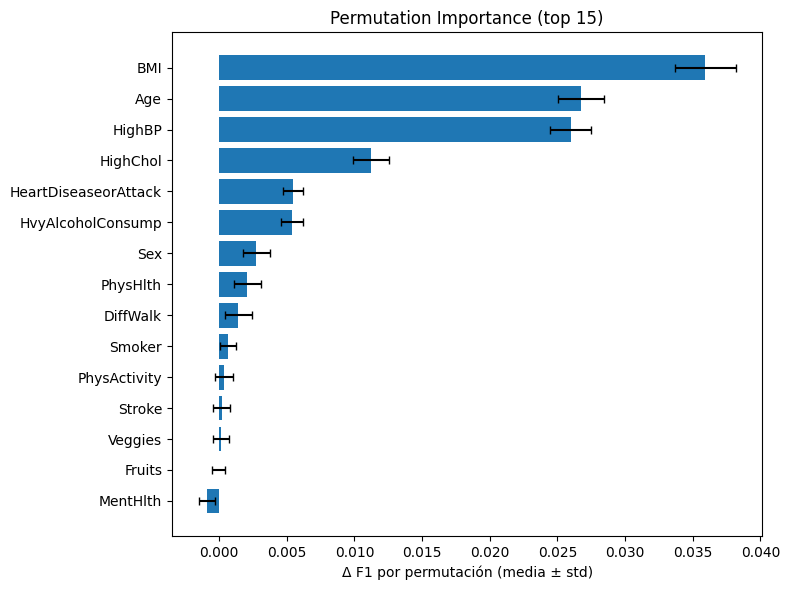

In [128]:
# Inserte su código aquí

from sklearn.inspection import permutation_importance

# Matriz que ve el booster (orden correcto) + nombres
Xt = pre.transform(X_test)                     # DataFrame (set_output='pandas')
feat = model.get_booster().feature_names or Xt.columns.tolist()
yte  = y_test.astype(int)

# Permutation importance (30 repeticiones)
res = permutation_importance(model, Xt, yte, scoring="f1",
                             n_repeats=30, random_state=42, n_jobs=-1)

# Tabla ordenada
perm = (pd.DataFrame({"feature": feat,
                      "mean": res.importances_mean,
                      "std":  res.importances_std})
        .sort_values("mean", ascending=False).reset_index(drop=True))
display(perm.head(15))

# Gráfico simple: barras con error (top-15)
topk = min(15, len(perm))
plot = perm.head(topk).iloc[::-1]  # invertimos para barh
plt.figure(figsize=(8,6))
plt.barh(plot["feature"], plot["mean"], xerr=plot["std"], capsize=3)
plt.xlabel("Δ F1 por permutación (media ± std)")
plt.title(f"Permutation Importance (top {topk})")
plt.tight_layout()
plt.show()


In [130]:
res

{'importances_mean': array([ 3.59259916e-02, -8.97942348e-04,  2.08676199e-03,  2.74646837e-03,
         1.12158481e-02,  6.41377985e-04,  5.45899537e-03,  3.68591049e-04,
        -1.23397352e-05,  1.40001504e-04,  5.36375638e-03,  1.40847116e-03,
         1.80266183e-04,  2.59802415e-02,  2.67425472e-02]),
 'importances_std': array([0.00223783, 0.00061333, 0.00098174, 0.00101064, 0.00130551,
        0.00059642, 0.00076693, 0.00066773, 0.00048152, 0.0006228 ,
        0.00081317, 0.00098915, 0.00060669, 0.00153659, 0.00168584]),
 'importances': array([[ 4.06722193e-02,  3.25782998e-02,  3.50580263e-02,
          3.53594260e-02,  3.82710870e-02,  3.52396264e-02,
          3.44044203e-02,  3.39093625e-02,  3.35625918e-02,
          3.88292453e-02,  3.61702177e-02,  3.71232056e-02,
          3.56373123e-02,  3.57751706e-02,  3.75482511e-02,
          3.89240380e-02,  3.69466141e-02,  3.37355522e-02,
          3.49149704e-02,  3.59924630e-02,  3.70858631e-02,
          3.24074471e-02,  3.34

### Respuestas Análisis
 
2. *Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?)*

  **R:** La desviación estándar refleja cuán estable es la caída de la métrica (ΔF1) al permutar cada variable a lo largo de las 30 repeticiones.

  - STD baja --> importancia estable y confiable entonces el efecto de “apagar” la variable es consistente (ej.: BMI ≈ 0.0022; Age ≈ 0.0017; HighBP ≈ 0.0015).
  - STD alta con una media pequeña o negativa --> importancia inestable o irrelevante (ej.: MentHlth, Fruits), típico de variables con poco aporte o solapadas por otras.

  Como regla práctica, el error estándar de la media es ≈ std/√30; en las variables “top” este valor es muy pequeño, lo que respalda que sus estimaciones de importancia sean sólidas.

4. *Además, responda las siguientes preguntas:*

  - *¿Cómo mide la importancia de las features su propuesta?*

    **R:** Mide cuánto empeora el desempeño del modelo cuando se rompe la relación entre una variable y el objetivo. La ruptura se hace barajando (permutando) los valores de esa variable solo en el set de test de forma que se conserva su distribución pero ya no guarda sentido con la etiqueta. Luego se re-evalúa el modelo sin reentrenar.
    
    Procedimiento (por variable):
    1) Calcular el desempeño base del modelo con la métrica elegida (aquí, F1).
    2) Permutar los valores de la variable en X_test.
    3) Volver a predecir y recalcular la métrica.
    4) La importancia es la caída de la métrica:

       Importancia = F1 base − F1 permutado = ΔF1 ; Mayor ΔF1 --> mayor importancia.

    5) Repetir para todas las variables.

    Para robustez, se repite la permutación 30 veces por variable; se reporta la media de ΔF1 como importancia y la desviación estándar como estabilidad de esa importancia. Este método es agnóstico al modelo, usa la métrica de interés y cuantifica el impacto real fuera de muestra de cada feature.
    
  - *¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?*

    **R:** Según mean (ΔF1):
    - BMI = 0.0359 ± 0.0022 → La obesidad es el factor más asociado a diabetes --> totalmente coherente.
    - Age = 0.0267 ± 0.0017 → El riesgo de diabetes aumenta con la edad --> esperable.
    - HighBP = 0.0260 ± 0.0015 → Hipertensión, comorbilidad del síndrome metabólico --> consistente.
    - HighChol = 0.0112 ± 0.0013 → Dislipidemia vinculada al riesgo metabólico --> razonable.
    - HeartDiseaseorAttack = 0.0055 ± 0.0008 → Cardiopatía previa coexiste con factores metabólicos --> plausible.
    
    **Contribuciones menores:** HvyAlcoholConsump, Sex, PhysHlth, DiffWalk, etc.; **muy bajas/negativas:** Fruits, MentHlth (sin evidencia de aporte, posible solapamiento).

  - *¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?* 

    **R** En ambos enfoques aparecen de forma consistente como variables relevantes BMI, Age, HighBP y HighChol. Sin embargo, el orden cambia cuando pasamos de las métricas internas de XGBoost a la importancia por permutación. Con Permutation Importance (ΔF1) el ranking que mejor explica la pérdida real de desempeño fuera de muestra es BMI, seguido por Age y HighBP, y luego HighChol y HeartDiseaseorAttack. Esto indica que, si “apagamos” cualquiera de esas variables, el F1 cae de forma apreciable y, además, la desviación estándar es baja, por lo que su efecto es estable.
    
    En cambio, las importancias internas cuentan historias distintas porque miden aspectos diferentes del arbolado. En gain predomina HighBP (sus splits, cuando aparecen, son muy “rentables”), y DiffWalk queda mejor posicionado que en permutación; BMI y Age no lideran allí. En weight, que contabiliza cuántas veces se usa una variable, destacan BMI y Age, pero también PhysHlth y MentHlth, que son continuas y tienen muchos puntos de corte; pese a ello, su ΔF1 real es pequeño. En cover sobresalen HvyAlcoholConsump y Stroke porque intervienen en splits que afectan a muchas filas, aunque su impacto sobre F1 al permutarlas sea moderado o bajo.
    
    Entonces, gain/weight/cover describen cómo el modelo utiliza las variables (calidad de los splits, frecuencia y cobertura), mientras que la permutación cuantifica cuánto pierde el rendimiento final si se rompe la información de una variable. Por eso, para priorizar variables desde el punto de vista predictivo fuera de muestra, las conclusiones se inclinan por BMI, Age y HighBP como factores críticos y estables; el resto aporta, pero menos de lo que podrían sugerir algunas métricas internas.

  - *Nombre y explique 3 ventajas y 3 desventajas del método implementado.*

    **R:** 
    * Ventajas.
    Primero, la agnosticidad y evaluación pos-ajuste -> la permutación se aplica sobre el modelo ya entrenado, sin cambiar sus parámetros. Por eso captura lo que el modelo realmente usa en combinación (no linealidades, interacciones, umbrales aprendidos) y cómo esas relaciones se traducen en desempeño fuera de muestra. A diferencia de métricas internas (p. ej., gain por split), aquí medimos el efecto global de “apagar” una variable en todos los árboles y en todas las rutas de decisión, que es lo que importa en producción.
    Segundo, es métrica-aware -> puedes medir la pérdida en la métrica de negocio que te interesa (F1, recall, AUC, etc.). Eso evita ambigüedades; si tu objetivo es, por ejemplo, maximizar recall en diabéticos, usas scoring="recall" y la importancia se interpreta como “cuánto baja el recall si quito esta variable”. La lectura es directa y accionable ya que puedes priorizas las variables que más sostienen esa métrica.
    Tercero, ofrece interpretación directa -> la cifra reportada es una caída promedio de la métrica al romper la relación entre la feature y el target. No requiere traducir “puntos de ganancia por split” ni frecuencias de uso; literalmente te dice “si quito esta variable, pierdo X puntos de F1”. Esto facilita justificar decisiones ante equipos clínicos o de negocio.

    * Desventajas.
    La principal es el costo computacional -> por cada variable y por cada repetición hay que volver a predecir sobre el conjunto de test, y eso escala como n_features × n_repeats. En modelos grandes o con muchos predictores, puede ser lento. 
    Luego está la colinealidad -> si dos variables son muy correlacionadas, al permutar una, la otra sigue aportando casi la misma información, por lo que la caída de la métrica será pequeña y la importancia saldrá subestimada. Esto no significa que la variable no sea útil, sino que su información es redundante con otra(s). 
    Por último, existe inestabilidad con señales débiles -> cuando el verdadero efecto es muy pequeño, las caídas por permutación pueden verse afectadas por el azar del barajado y del muestreo, generando importancias cercanas a cero o incluso negativas (ruido). Esto se acentúa si el set de test es chico o no representativo. 
    
    Todas estas desventajas tienen formas de mitigarse y mejorar los modelos.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [131]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [132]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

100%|===================| 21089/21127 [07:06<00:00]        

            BMI  MentHlth  PhysHlth       Sex  HighChol    Smoker  \
46483 -0.142980  0.003284  0.048308  0.025014  0.064753 -0.010954   
53938  0.231969 -0.003697 -0.033952 -0.018634  0.051221 -0.002338   
64681 -0.150778 -0.003615 -0.023723  0.013184  0.031786 -0.011233   
28731  0.110235 -0.011328 -0.020478  0.023363 -0.054913  0.011050   
29055 -0.014889 -0.015987  0.000153 -0.009265  0.065269 -0.011821   

       HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  \
46483             -0.011184     -0.009935 -0.001616  0.048039   
53938             -0.006689      0.030557 -0.002184 -0.002768   
64681              0.081630     -0.012556 -0.000248 -0.010230   
28731              0.111277      0.032305  0.001385  0.022989   
29055             -0.025233     -0.009798  0.002285 -0.016286   

       HvyAlcoholConsump  DiffWalk    Stroke    HighBP       Age  
46483           0.011589 -0.014001  0.092022  0.081077  0.038298  
53938           0.003145  0.069024 -0.001401  0.100526 -0.02

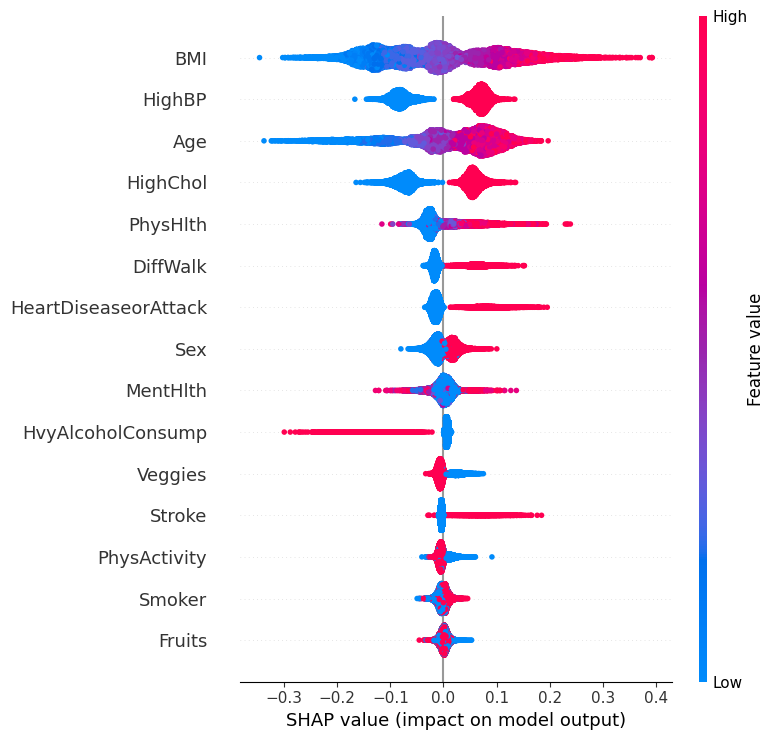

In [168]:
# Inserte código para calcular shapley values aquí

import shap

# Pasos del pipeline ya entrenado
pre   = xgb_pipeline.named_steps["pre"]  
model = xgb_pipeline.named_steps["xgb"]  

# Matrices preprocesadas y nombres
Xte = pre.transform(X_test)                       
Xtr = pre.transform(X_train)            
feat_names = Xte.columns.tolist()

# Background
bg = Xtr.sample(min(1000, len(Xtr)), random_state=42)

# Explainer: probas + interventional (esto fue necesario para evitar un error que tirabaq el codigo iniciamente)
explainer = shap.TreeExplainer(
    model,
    data=bg,
    feature_perturbation="interventional",
    model_output="probability"
)

# SHAP values en test
shap_values = explainer.shap_values(Xte.values)
shap_df = pd.DataFrame(shap_values, columns=feat_names, index=Xte.index)

print(shap_df.head())

# Gráfico resumen 
shap.summary_plot(shap_values, Xte, feature_names=feat_names,max_display=15)


**Desarrollo parte teoríca**

- ¿Qué representa cada número en su resultado?

Cada número del gráfico representa un valor SHAP (*SHapley Additive exPlanation*), que cuantifica cuánto aporta cada variable individualmente a la predicción del modelo para cada observación. En otras palabras, cada punto corresponde al impacto de una variable específica sobre la probabilidad predicha de diabetes en un caso concreto.

- ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

Si, es posible pues los valores positivos de SHAP indican que esa variable aumenta la probabilidad de que el modelo prediga diabetes (empuja la predicción hacia la clase positiva), mientras que los valores negativos significan que disminuye dicha probabilidad (empuja hacia la clase negativa o ausencia de diabetes). Esto es específicamente para el gráfico, ya que nos entrega información de 3 variables: relevancia de las características, valores que puede tomar cada feature (alto, medio, o bajo) y los shap values. La tabla por si sola cuesta ver el efecto de los rangos de valores de cada variable en la predicción de acuerdo al valor shap.

El color de cada punto refleja el valor real de la variable:

* En tonos rosados/rojos se encuentran los valores altos de la variable (por ejemplo, un IMC o una edad elevada).
* En tonos azules se encuentran los valores bajos (por ejemplo, un IMC o edad baja).

Así, por ejemplo, en este gráfico se observa que valores altos de **BMI**, **HighBP**, **Age** y **HighChol** (rojo hacia la derecha) incrementan la probabilidad de diabetes, mientras que valores bajos de estas variables (azul hacia la izquierda) la reducen. De forma inversa, variables como **PhysHlth** o **PhysActivity**, cuando presentan valores más bajos (mejor estado de salud o mayor actividad), tienden a disminuir el riesgo predicho. En conjunto, la magnitud y el signo de los valores SHAP permiten interpretar de manera directa la dirección y la intensidad de la influencia de cada variable en las predicciones del modelo.

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

Aporte local para la instancia 1:


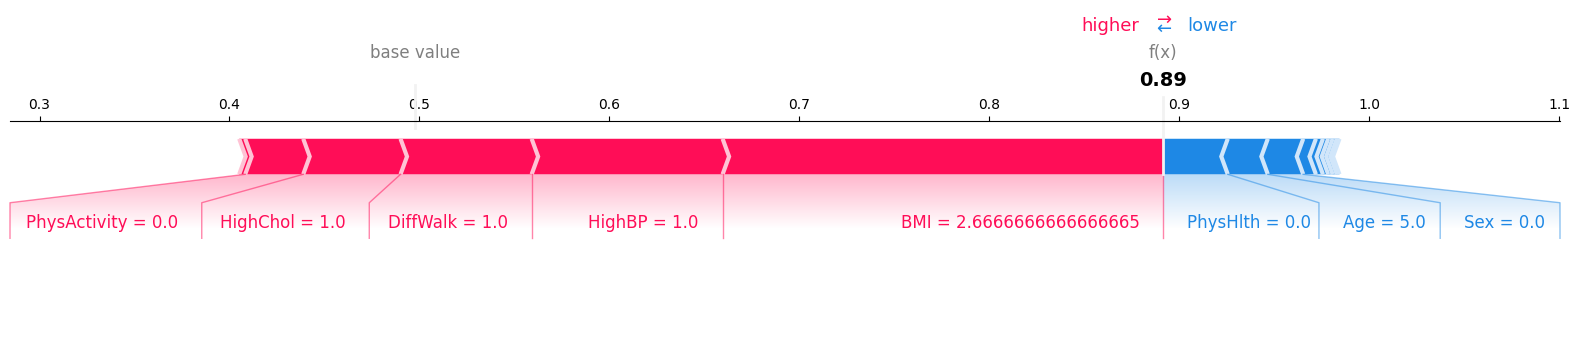

Aporte local para la instancia 9:


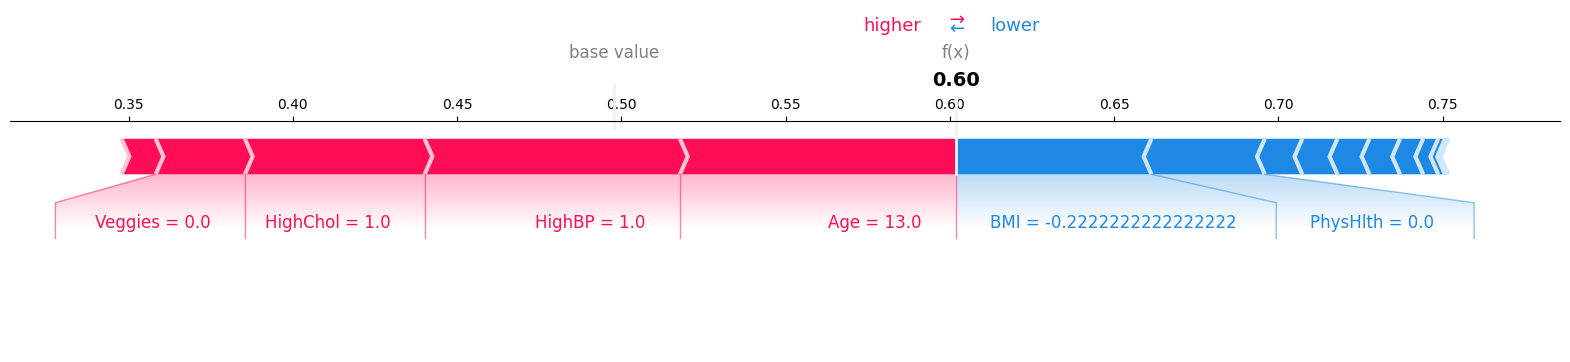

Aporte local para la instancia 150:


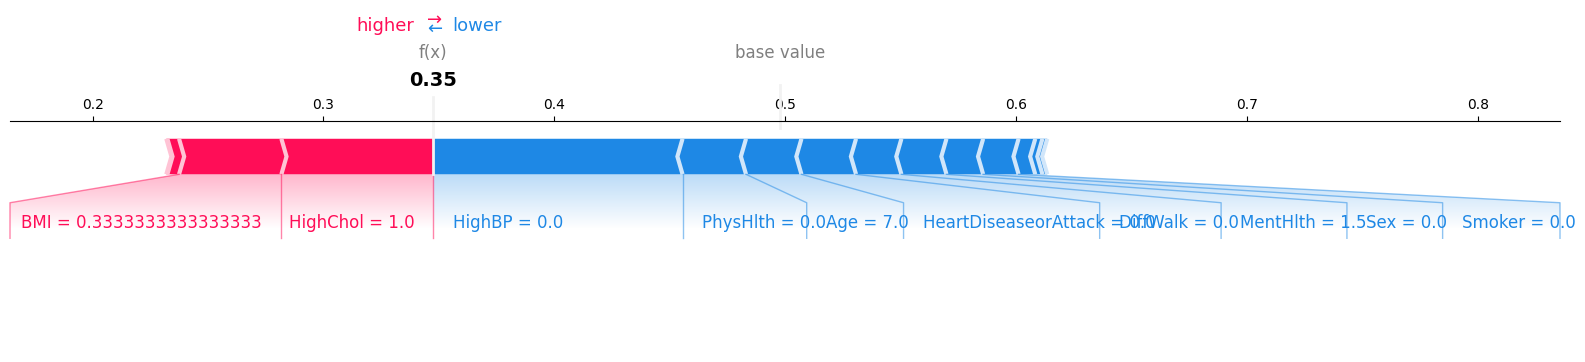

In [ ]:
# Inserte código para generar gráficos de aporte local aquí

# Asegura referencias correctas
feat_names = Xte.columns.tolist()

# Soporte para salida binaria
if isinstance(shap_values, list):
    sv = shap_values[1]                       # clase positiva
    base_val = explainer.expected_value[1]
else:
    sv = shap_values
    base_val = explainer.expected_value

# Instancias por posición (iloc)
indices = [1, 9, 150]

for i in indices:
    print(f"Aporte local para la instancia {i}:")
    shap.force_plot(
        base_val,                 # valor esperado (baseline)
        sv[i],                    # shap values de la instancia i
        Xte.iloc[i],              # fila transformada correspondiente
        feature_names=feat_names,  # nombres alineados a Xte
        matplotlib=True
    )

*Desarrollo parte teoríca*

- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

Variables que aumentan la probabilidad de diabetes son principalmente *HighBP = 1, **HighChol = 1, **BMI alto, **baja actividad física (PhysActivity = 0)* y *dificultad para caminar (DiffWalk = 1). En cambio, variables que reducen la probabilidad son **PhysHlth = 0* (sin días de mala salud física), *HighBP = 0, **HeartDiseaseorAttack = 0, **Smoker = 0* y un *BMI más bajo*.

En la *instancia 1 (f(x) ≈ 0.89)*, el riesgo aumenta por la combinación de hipertensión, colesterol alto, inactividad, dificultad para caminar y un IMC elevado, mientras que disminuye por una buena salud física, menor edad y sexo femenino.
En la *instancia 9 (f(x) ≈ 0.60)*, el riesgo se eleva por hipertensión, colesterol alto, edad avanzada y baja ingesta de vegetales, pero se atenúa por un IMC más bajo y buena salud física.
En la *instancia 150 (f(x) ≈ 0.35)*, el colesterol alto y un IMC moderadamente elevado aumentan la probabilidad, mientras que la ausencia de hipertensión, buena salud física, edad media, ausencia de enfermedades cardíacas, mejor salud mental, no fumar y sexo femenino reducen el riesgo.

En conjunto, el patrón observado es consistente pues una presión alta, con colesterol elevado y exceso de peso incrementan la probabilidad de diabetes, mientras que mejor salud física y estilos de vida saludables la reducen.

- ¿Existe algún patrón común entre las instancias analizadas? 

El patrón común entre las tres instancias muestra que el colesterol alto (HighChol) incrementa la probabilidad de diabetes en todos los casos, mientras que la presión arterial alta (HighBP) eleva el riesgo cuando está presente (instancias 1 y 9) y lo reduce cuando está ausente (instancia 150). La buena salud física (PhysHlth = 0) actúa como un factor protector en las tres observaciones. Además, el IMC (BMI) generalmente aumenta el riesgo en las instancias 1 y 150, aunque en la instancia 9 su efecto es levemente negativo por un valor más bajo del que el modelo asocia con riesgo. Finalmente, la edad no tiene un efecto lineal pues en las instancias 1 y 150 tiende a reducir la probabilidad, mientras que en la instancia 9 la incrementa, reflejando la relación no lineal que el modelo capta entre edad y diabetes.

Es notable que hubo un cambio en f(x): El valor de 
f(x) varía entre las instancias porque refleja la probabilidad individual estimada por el modelo de que una persona tenga diabetes.
Cuando las variables con efecto positivo (como HighChol = 1 o DiffWalk = 1.0 1) están presentes, el modelo incrementa fuertemente la predicción, elevando f(x) por sobre el valor base.
En cambio, cuando predominan características con efectos negativos (como PhysHlt=0.0 o BMI nulo, DiffWalk=0.0), el valor final 
f(x) se reduce, incluso por debajo del promedio.
Por lo tanto, las diferencias observadas en f(x) son consecuencias directas de los efectos locales de las variables sobre cada individuo.

- ¿Es posible generalizar estas conclusiones a todo el dataset?

Las conclusiones pueden generalizarse solo de forma parcial, ya que los valores SHAP analizados corresponden a efectos locales, específicos de cada individuo. Para obtener una visión global, se debe revisar el summary plot general de SHAP, que confirma que las variables GenHlth, HighBP, BMI, Age y HighChol son las principales impulsoras del modelo. La magnitud media de los valores absolutos de SHAP indica la importancia global de cada variable. Además, es necesario comprobar la consistencia de los resultados por subgrupos (como edad) y entre distintas particiones de validación, verificando que el orden e influencia de las variables se mantengan. Finalmente, deben considerarse las interacciones entre variables (por ejemplo, BMI × Age o PhysActivity × BMI), ya que explican por qué algunas relaciones, como la de la edad, no son lineales.

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

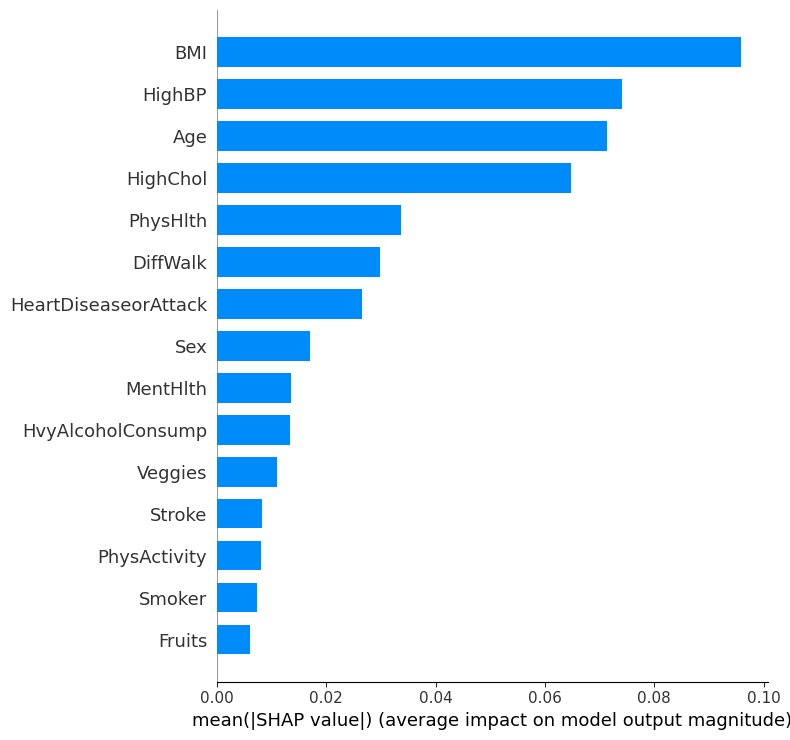

In [ ]:
# Inserte código para generar gráficos de aporte global aquí

# Matriz transformada y nombres
X_test_transformed = Xte      
feat_names = X_test_transformed.columns.tolist()

# shap_values puede ser lista [neg, pos] o un array
if isinstance(shap_values, list):
    sv_global = shap_values[1]   # clase positiva
else:
    sv_global = shap_values

shap.summary_plot(
    sv_global,                   # valores SHAP
    X_test_transformed,          # features transformadas (DataFrame)
    feature_names=feat_names,    # nombres alineados a X_test_transformed
    plot_type="bar",             # importancia global por suma de |SHAP|
    max_display=15
)

**Desarrollo parte teorica**

- Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

*Interpretación de resultados*

El gráfico refleja la importancia global de cada variable según los valores medios absolutos de SHAP, que indican cuánto contribuye cada característica, en promedio, a modificar la predicción del modelo sin considerar si el efecto es positivo o negativo. En este caso, el **IMC (BMI)** es el factor con mayor influencia global, ya que pequeñas variaciones en su valor generan los cambios más significativos en la probabilidad de diabetes. Le siguen la **presión arterial alta (HighBP)** y la **edad (Age)**, lo que evidencia que el modelo identifica correctamente la relación esperada entre hipertensión, envejecimiento (aunque igual sean niños jóvenes) y riesgo de desarrollar diabetes. El **colesterol alto (HighChol)** ocupa el cuarto lugar, lo que refuerza su papel dentro del perfil metabólico asociado a la enfermedad. En un segundo nivel aparecen **PhysHlth** (salud física reciente) y **DiffWalk** (dificultad para caminar), que reflejan aspectos funcionales o comorbilidades, mientras que **HeartDiseaseorAttack** también muestra un peso relevante, coherente con la alta frecuencia de enfermedades cardiovasculares en personas diabéticas. En contraste, variables como **Sex**, **MentHlth**, **HvyAlcoholConsump**, **Veggies**, **Stroke**, **PhysActivity**, **Smoker** y **Fruits** presentan un impacto mucho menor, lo que sugiere que su efecto sobre las predicciones del modelo es marginal o depende de interacciones con otros factores. Al final, el modelo basa su capacidad predictiva principalmente en variables fisiológicas y clínicas como IMC, presión arterial, edad y colesterol, mientras que los hábitos de vida y las variables psicológicas tienen una influencia reducida en el comportamiento global del modelo.

*Comparación global vs. local (versión más lineal):*

El modelo, a nivel global, basa sus predicciones principalmente en **BMI**, **HighBP**, **Age** y **HighChol**, seguidas por **PhysHlth**, **DiffWalk** y **HeartDiseaseorAttack**. Estas variables son las que más influyen en la salida del modelo en promedio, sin importar si el efecto es positivo o negativo.

En cambio, a nivel local (caso a caso), las contribuciones varían:

* En la **instancia 1**, el riesgo aumenta por **HighBP=1**, **HighChol=1**, **DiffWalk=1**, **PhysActivity=0** e **IMC alto**, y disminuye por **PhysHlth=0**, **Age** más bajo y **Sex=0**.
* En la **instancia 9**, aumenta con **HighBP=1**, **HighChol=1**, **Age** alto y **Veggies=0**, y disminuye por **BMI** bajo y **PhysHlth=0**.
* En la **instancia 150**, aumenta con **HighChol=1** y **BMI** moderado, y disminuye con **HighBP=0**, **PhysHlth=0**, **Age** medio, **HeartDiseaseorAttack=0**, **DiffWalk=0**, **MentHlth** bajo, **Smoker=0** y **Sex=0**.
  En los tres casos, **PhysHlth=0** actúa como factor protector, mientras que **HighChol** y **HighBP=1** elevan el riesgo.

Las diferencias entre el análisis global y local son claras pues el gráfico global muestra cuánto pesa cada variable en promedio, pero no en qué dirección influye. En cambio, los gráficos locales indican el efecto específico en cada paciente. Además, una variable con impacto medio a nivel global puede ser determinante en un caso individual. Factores como Age o BMI cambian de signo según sus interacciones con otras variables (por ejemplo, **Age×BMI** o **PhysActivity×BMI**).

Entonces, globalmente el modelo se apoya sobre todo en **IMC, presión arterial, edad y colesterol**, pero a nivel individual, la **dirección y magnitud** del efecto dependen de la combinación particular de características de cada persona.


### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

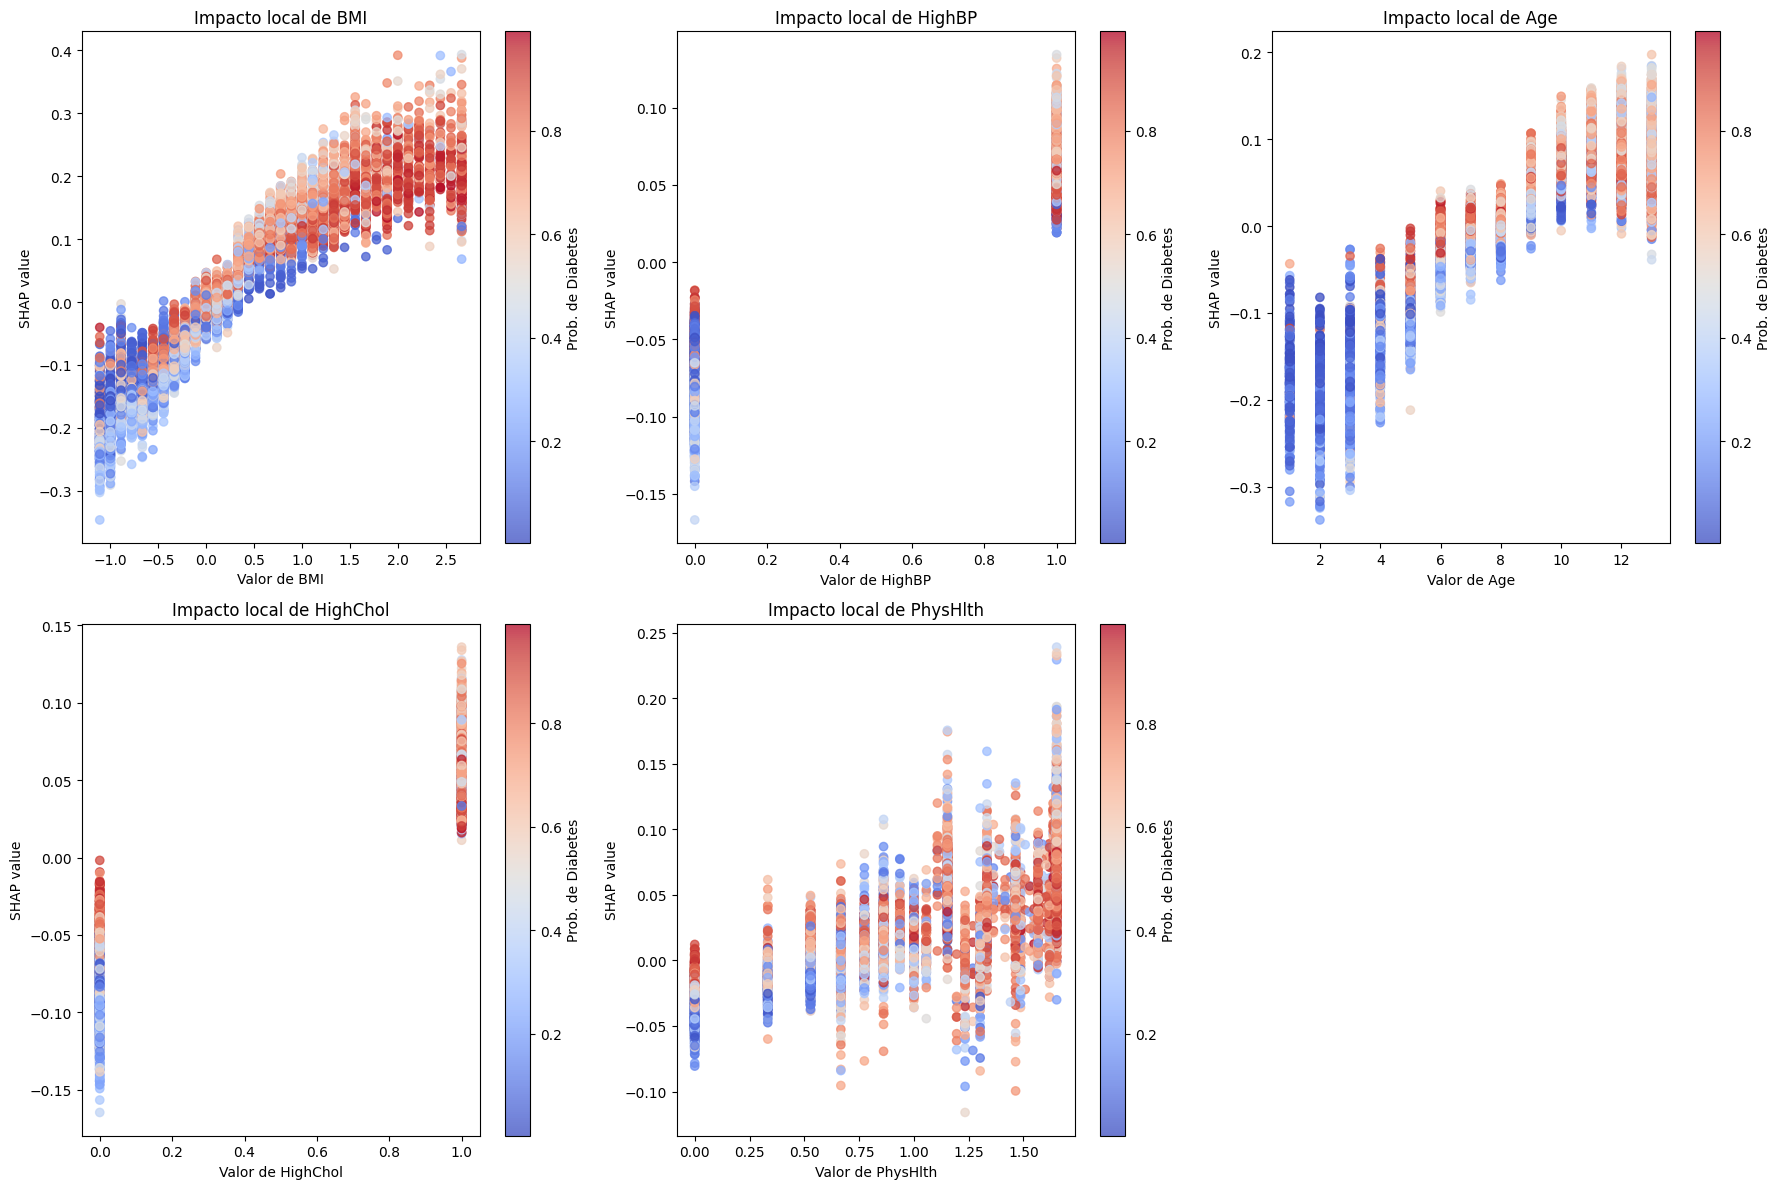

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

# Preparación
pre   = xgb_pipeline.named_steps["pre"]
model = xgb_pipeline.named_steps["xgb"]

Xte = pre.transform(X_test)               
feat_names = Xte.columns.tolist()

# shap_values
sv = shap_values[1] if isinstance(shap_values, list) else shap_values 

# Importancia global = media de |SHAP| por feature
mean_abs_shap = np.abs(sv).mean(axis=0)
top_idx = np.argsort(mean_abs_shap)[-5:][::-1]    # índices top 5 descendente
top_feats = [feat_names[i] for i in top_idx]

# Probabilidad de clase positiva (diabetes) para colorear
probs = xgb_pipeline.predict_proba(X_test)[:, 1]

# Scatterplots
plt.figure(figsize=(18, 12))

for k, (idx, fname) in enumerate(zip(top_idx, top_feats), start=1):
    x_vals = Xte.iloc[:, idx].values         
    y_vals = sv[:, idx]                  

    ax = plt.subplot(2, 3, k)
    sc = ax.scatter(x_vals, y_vals, c=probs, cmap="coolwarm", alpha=0.75)
    ax.set_xlabel(f"Valor de {fname}")
    ax.set_ylabel("SHAP value")
    ax.set_title(f"Impacto local de {fname}")
    plt.colorbar(sc, ax=ax, label="Prob. de Diabetes")

plt.tight_layout()
plt.show()

**Respuestas desarrollo**

- ¿Qué puede concluir de sus resultados?

Los gráficos muestran cómo varía el impacto local (valores SHAP) de cada variable sobre la probabilidad de diabetes en función de su valor real.

En el caso de **BMI**, se observa una relación claramente ascendente ya que a medida que el IMC aumenta, también lo hace el valor SHAP, lo que significa que los individuos con mayor IMC contribuyen positivamente a la probabilidad predicha de diabetes. Este patrón es consistente y muestra una tendencia monótona hasta cierto punto, donde parece estabilizarse, lo que sugiere que el modelo aprende un umbral a partir del cual el riesgo deja de crecer de forma significativa.

Para **HighBP** y **HighChol**, el cambio de 0 a 1 genera un aumento marcado en los valores SHAP, indicando que la presencia de hipertensión o colesterol alto incrementa el riesgo predicho de diabetes.

En **Age**, la relación también es positiva y casi lineal donde a mayor edad, el modelo incrementa la probabilidad predicha, reflejando que el envejecimiento está asociado a un riesgo más alto.

Finalmente, **PhysHlth** presenta una relación más dispersa y variable, lo que sugiere un efecto más débil o heterogéneo pues en general, valores más altos (peor salud física reciente) tienden a aumentar el riesgo, pero con alta variabilidad individual, posiblemente por interacciones con otras variables o baja densidad de datos en ciertos rangos.

En conjunto, los resultados confirman los patrones observados en los análisis globales (SHAP summary y PDP) donde **IMC, presión arterial, edad y colesterol** son los determinantes más consistentes y de efecto positivo sobre el riesgo de diabetes, mientras que PhysHlth aporta información más ruidosa y dependiente del contexto individual.

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

Top-5 (orden SHAP): ['BMI', 'HighBP', 'Age', 'HighChol', 'PhysHlth']
Top-5 usado en PDP: ['BMI', 'HighBP', 'Age', 'HighChol', 'PhysHlth']


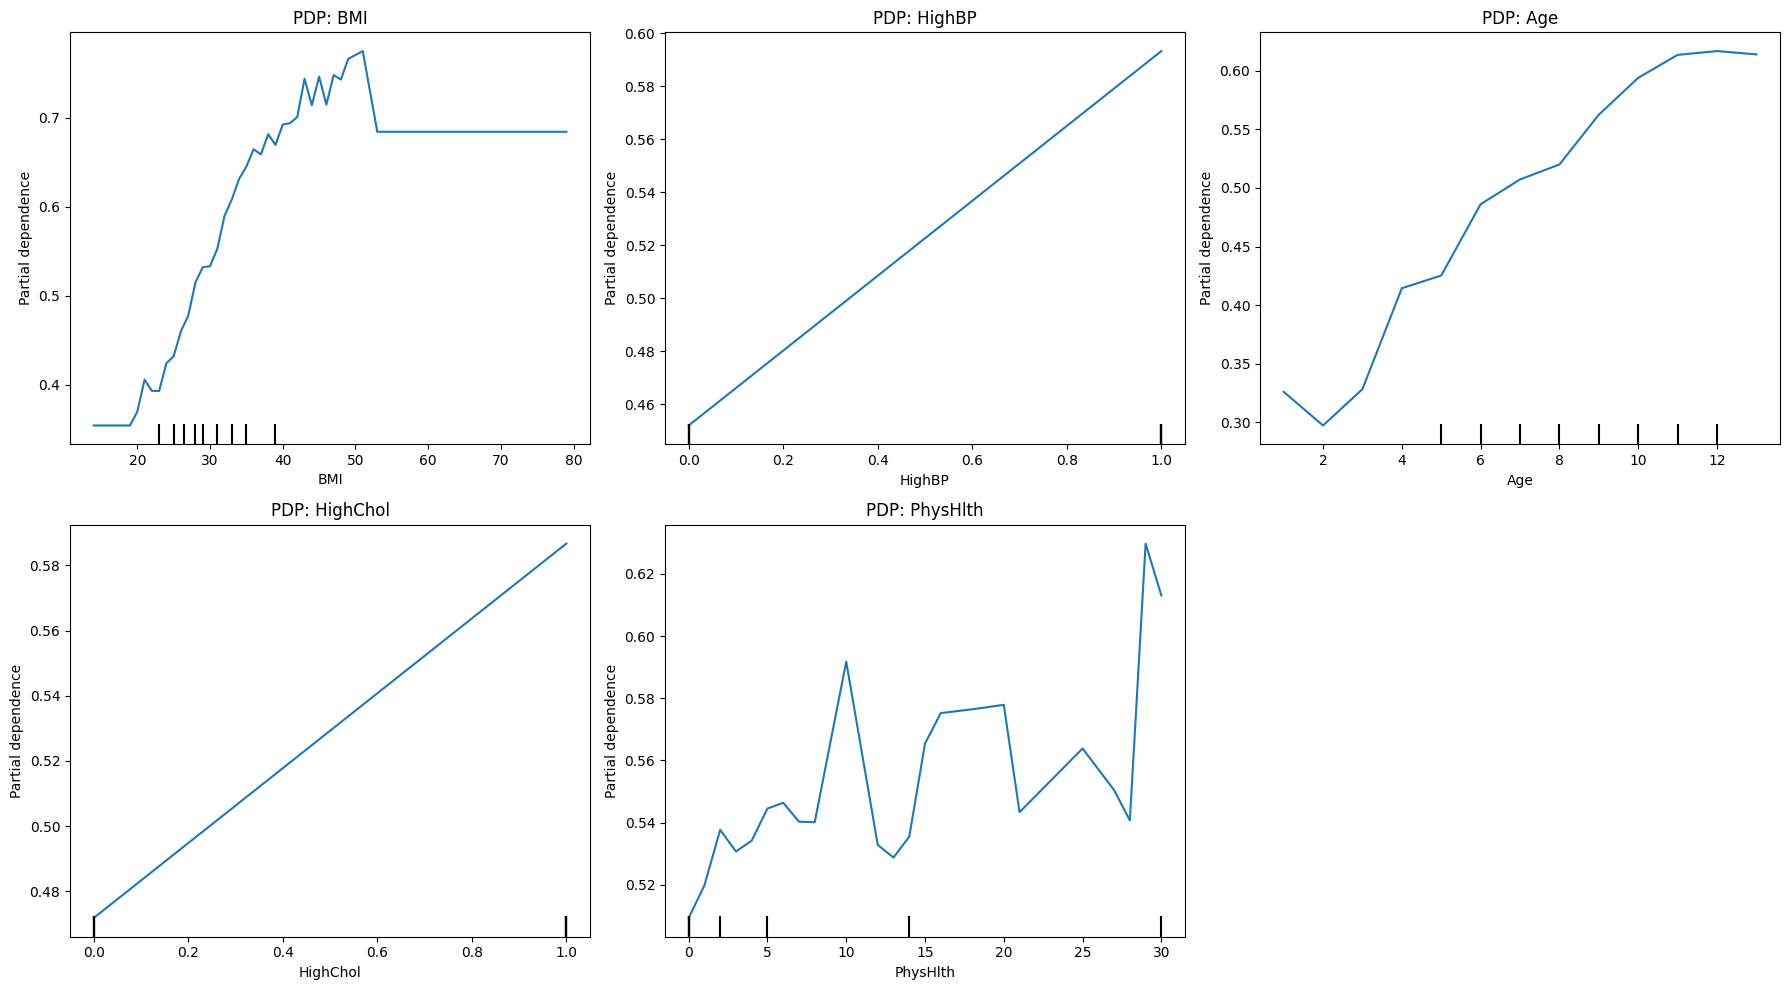

In [ ]:
# Inserte código para generar gráficos PDP aquí
from sklearn.inspection import PartialDependenceDisplay

# Top 5 por impacto global SHAP (media de |SHAP|)
pre   = xgb_pipeline.named_steps["pre"]
Xte   = pre.transform(X_test)                  
feat_names = Xte.columns.tolist()

sv = shap_values[1] if isinstance(shap_values, list) else shap_values
mean_abs_shap = np.abs(sv).mean(axis=0)
top_idx = np.argsort(mean_abs_shap)[-5:][::-1]    # índices top5 descendente en Xte
top_feats_trans = [feat_names[i] for i in top_idx]

# Alinear a nombres que PDP 
top_feats_pdp = [f for f in top_feats_trans if f in X_test.columns][:5]
# confirmo que sean las mismas que el scatterplot
print("Top-5 (orden SHAP):", top_feats_trans)
print("Top-5 usado en PDP:", top_feats_pdp)


# PDP 

X_sample = X_test.sample(n=1000, random_state=42)  

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
ax = ax.flatten()
for i, fname in enumerate(top_feats_pdp):
    PartialDependenceDisplay.from_estimator(
        estimator=xgb_pipeline,
        X=X_sample,
        features=[fname],
        ax=ax[i],
        kind="average",
        grid_resolution=50
    )
    ax[i].set_title(f"PDP: {fname}")
if len(top_feats_pdp) < 6:
    fig.delaxes(ax[5])
plt.tight_layout(); plt.show()

**Desarrollo parte teorica**

- ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

**Relación salida–feature (PDP):**

El modelo muestra una relación creciente entre la probabilidad media predicha y BMI (aumenta de forma casi monótona y no lineal y luego se aplana en los valores más altos). En HighBP, pasar de 0 a 1 produce un salto claro de la salida promedio (mayor riesgo). En Age la curva es ascendente y con ligera saturación en los tramos finales. En HighChol, el cambio de 0 a 1 también eleva la salida promedio de forma casi lineal. En PhysHlth, la relación es débil y no estrictamente monótona pues hay variación y picos aislados, lo que sugiere menor efecto o poca cobertura de datos en algunos rangos.

**¿Se puede generalizar?**

Solo parcialmente. Los PDP describen el efecto marginal promedio “manteniendo fijo lo demás”, por lo que son fiables en zonas con datos (marcas en el eje) y cuando no hay fuerte correlación entre variables. No deben extrapolarse a regiones sparsas ni interpretarse como causalidad. Para fortalecer la generalización, conviene contrastar con SHAP global/local, usar ALE si hay correlaciones, y (si es posible) añadir bandas de confianza o bootstrap de PDP. En este conjunto, las conclusiones de relación positiva para BMI, HighBP, Age y HighChol son consistentes; la de PhysHlth es más incierta y dependiente de la cobertura.

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [164]:
!pip install alibi --quiet
!pip install alibi[ray] --quiet
!pip install --upgrade scipy --quiet


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\senza\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [165]:
from alibi.explainers import AnchorTabular
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

In [ ]:
# Desarrollo de las reglas para el modelo

# Redefino para eviar equivocarme 
Xtr = pre.transform(X_train)            
Xte = pre.transform(X_test)              
feat_names = Xte.columns.tolist()

# Aseguramos target como array 1D
y_tr = y_train.values if hasattr(y_train, "values") else y_train
y_te = y_test.values  if hasattr(y_test,  "values") else y_test

# Predicciones del modelo
y_pred_test = xgb_pipeline.predict(X_test)   

# Defino reglas
def reglas_simi(df):
    return (
        (df["BMI"]  > 1.00)                   
    ) | (
        (df["Age"]  > 0.50) & (df["HighBP"] == 1) 
    )

# Aplicación de reglas
mask = reglas_simi(Xte)         

# Métricas

cobertura = mask.mean()                       
poblacion_cubierta = int(mask.sum())           

# Predicción 
y_rule = mask.astype(int).values             

# Precisión
precision_global = precision_score(y_te, y_rule, zero_division=0)
accuracy_global  = accuracy_score(y_te, y_rule)
cm = confusion_matrix(y_te, y_rule)

# Precisión dentro del subconjunto 
precision_en_cubiertos = (y_te[mask.values] == 1).mean() if mask.any() else float("nan")

print(f"Cobertura de las reglas: {cobertura*100:.2f}%  (n={poblacion_cubierta} de {len(Xte)})")
print(f"Precisión GLOBAL de las reglas (PPV sobre todo el set): {precision_global*100:.2f}%")
print(f"Accuracy GLOBAL de las reglas: {accuracy_global*100:.2f}%")
print("Matriz de confusión (y_real vs y_regla):\n", cm)
print(f"Precisión SOLO entre cubiertos por reglas: {precision_en_cubiertos*100:.2f}%")

recall = recall_score(y_te, y_rule) 
specificity = cm[0,0] / (cm[0,0] + cm[0,1])  

print(f"Recall (sensibilidad): {recall*100:.2f}%")
print(f"Especificidad: {specificity*100:.2f}%")

#  Explicar las observaciones pedidas aplicando las reglas definidas y la rpedicción
for idx in [1000, 3001, 5751]:
    cumple = bool(mask.iloc[idx])
    pred_modelo = int(y_pred_test[idx])
    pred_regla  = int(cumple)              
    print(f"Obs {idx} | Cumple regla: {cumple} | Predicción REGLA: {pred_regla} | Predicción MODELO: {pred_modelo} | y_real: {int(y_te[idx])}")

Cobertura de las reglas: 60.42%  (n=12764 de 21127)
Precisión GLOBAL de las reglas (PPV sobre todo el set): 66.62%
Accuracy GLOBAL de las reglas: 67.92%
Matriz de confusión (y_real vs y_regla):
 [[5845 4260]
 [2518 8504]]
Precisión SOLO entre cubiertos por reglas: 66.62%
Recall (sensibilidad): 77.15%
Especificidad: 57.84%
Obs 1000 | Cumple regla: False | Predicción REGLA: 0 | Predicción MODELO: 0 | y_real: 0
Obs 3001 | Cumple regla: True | Predicción REGLA: 1 | Predicción MODELO: 1 | y_real: 1
Obs 5751 | Cumple regla: False | Predicción REGLA: 0 | Predicción MODELO: 0 | y_real: 0


**Respuesta desarrollo*

## Sistema de reglas y cómo se aplica

Con el objetivo de simplificar el funcionamiento del modelo y hacerlo comprensible para el Dr. Simi y sus pacientes, se desarrolló un sistema de reglas sobre las mismas variables preprocesadas que utiliza el clasificador XGBoost. Las reglas activan una predicción positiva cuando se observa un perfil de alto riesgo caracterizado por índice de masa corporal elevado o por la combinación de edad alta e hipertensión. Esta aproximación no busca reproducir la complejidad completa del modelo, sino resumir sus factores dominantes de riesgo en criterios clínicos legibles y consistentes con las explicaciones globales (Permutation Importance y SHAP).

## Cobertura y precisión de las reglas (impacto global)

En el conjunto de prueba, las reglas permiten explicar el 60,42 % de la población (12 764 de 21 127 observaciones). Es decir, para seis de cada diez pacientes puede entregarse una justificación directa y coherente con el modelo.

La precisión global (PPV) alcanza 66,62 %, lo que implica que dos de cada tres pacientes clasificados como “en riesgo” efectivamente presentan diabetes. El accuracy global es de 67,92 %, y la matriz de confusión es la siguiente:

[TN=5845 FN=2518]
[FP=4260 TP=8504]

De estos valores se derivan:

Recall (sensibilidad): 77,15 % → las reglas capturan aproximadamente tres de cada cuatro casos positivos.

Especificidad: 57,84 % → descartan correctamente cerca de seis de cada diez negativos.

El sistema de reglas es inclusivo y explicativo, con buena sensibilidad y cobertura, a costa de una especificidad moderada. Este comportamiento es coherente con el objetivo clínico del Dr. Simi que es priorizar la capacidad de detección y comprensión por sobre la optimización técnica del modelo.

## Explicación local de los tres casos solicitados

- Obs 1000: no cumple ninguna regla → predicción 0 (modelo 0, y_real 0). No presenta los disparadores de alto riesgo; hay coherencia total entre reglas, modelo y realidad.

- Obs 3001: cumple la regla de Edad alta + HighBP = 1 → predicción 1 (modelo 1, y_real 1). Corresponde a un perfil cardio-metabólico típico, alineado con los principales factores explicativos del modelo.

- Obs 5751: no cumple las reglas → predicción 0 (modelo 0, y_real 0). No muestra las condiciones de riesgo y nuevamente coincide con la salida del modelo y la etiqueta real.

En los tres casos se observa consistencia entre reglas, modelo y etiqueta, confirmando que las reglas capturan los patrones relevantes sin introducir contradicciones.

## ¿Tienen sentido las reglas? Fundamentación

Las reglas propuestas tienen pleno sentido clínico. Traducen directamente los principales determinantes identificados por el modelo (BMI, Age y HighBP) en un lenguaje sencillo que puede ser comunicado a los pacientes. Su impacto global refleja un compromiso adecuado entre cobertura y precisión pues el sistema explica una proporción amplia de la población, mantiene coherencia con los resultados de SHAP y Permutation Importance, y reproduce la lógica epidemiológica esperable (riesgo creciente con obesidad, edad e hipertensión).

Asi que el modelo del Dr. Simi logra su objetivo de interpretabilidad aplicada ya que transforma un clasificador complejo en un conjunto de reglas comprensibles que permiten explicar decisiones individuales y describir tendencias globales sin perder validez estadística. Si se requiriera más precisión o mayor cobertura, bastaría ajustar los umbrales de BMI y edad o la combinación de condiciones, manteniendo la correspondencia con las variables del pipeline.

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

*R:*

En este análisis se integran las importancias internas de XGBoost (gain, weight, cover), la Permutation Importance con 30 repeticiones, los métodos SHAP (globales y locales) y los gráficos de dependencia parcial (PDP) para comprender cómo el modelo de clasificación de diabetes toma sus decisiones y qué variables resultan más determinantes.

Primero, es necesario diferenciar entre los métodos que explican el comportamiento global del modelo y los que permiten entender la predicción de un individuo específico. Las importancias internas de XGBoost, obtenidas a partir de weight, cover y gain, sirven como un diagnóstico estructural del modelo. Weight indica cuántas veces una variable participa en los splits, cover mide cuántas observaciones pasan por esos splits, y gain resume la ganancia promedio de impureza que cada variable aporta. Aunque estas métricas ofrecen una visión rápida y son sencillas de obtener, no reflejan pérdida real de desempeño y tienden a sesgarse hacia variables con muchos puntos de corte o alta cardinalidad. En los gráficos se observa que los top varían entre métodos, evidenciando esta limitación. Por ello, las importancias internas son útiles como referencia exploratoria, pero no como base principal de interpretación.

Para un ranking global más robusto, la Permutation Importance entrega una medida más confiable. Este método evalúa la caída en la métrica objetivo (en este caso, ΔF1) al permutar aleatoriamente una variable, rompiendo su relación con el target. Al repetir el proceso 30 veces, se obtiene una media y desviación estándar, lo que permite estimar la estabilidad de cada atributo. Los resultados muestran que BMI, Age y HighBP lideran consistentemente con baja variabilidad, seguidos por HighChol, mientras que PhysHlth y MentHlth presentan efectos menores o inestables, posiblemente debido a colinealidad con otras variables. Esta lectura global es consistente con el resumen de SHAP, que confirma el mismo orden de relevancia, y con los PDP que describen la forma del efecto.

Los gráficos PDP permiten observar la relación promedio entre cada variable y la probabilidad de diabetes, manteniendo el resto de las variables constantes. En ellos se aprecia un patrón monótono creciente para BMI, HighBP y Age donde el riesgo aumenta con el índice de masa corporal hasta una meseta alrededor de 40–50, crece suavemente con la edad y se incrementa de manera inmediata al pasar de 0 a 1 en las variables binarias de hipertensión o colesterol alto. PhysHlth, en cambio, presenta variaciones más irregulares, lo que sugiere interacciones con otras variables. Estos gráficos son útiles para traducir hallazgos en reglas interpretables, por ejemplo, “el riesgo aumenta significativamente con BMI ≥ 28 o con presencia de hipertensión”. No obstante, al ser promedios, pueden suavizar efectos cuando hay correlaciones entre predictores.

Además de los gráficos PDP, los scatter plots de SHAP (también llamados dependence plots) complementan el análisis mostrando el impacto local de cada observación sobre la predicción. En ellos, cada punto representa un individuo, el eje X indica el valor real de la variable y el eje Y el valor SHAP asociado, es decir, cuánto aporta ese atributo a la probabilidad de diabetes. El color indica la probabilidad predicha o el valor de otra variable correlacionada, lo que permite detectar interacciones. Estos gráficos confirman las tendencias observadas en los PDP donde el riesgo aumenta con BMI, HighBP y Age, pero además revelan la variabilidad entre personas y la existencia de subgrupos. En variables como PhysHlth o DiffWalk, el patrón disperso indica interacciones o comportamientos no lineales que los PDP tienden a suavizar. Por tanto, los scatter plots de SHAP sirven como un puente entre la explicación global y la individual, mostrando cómo cada persona contribuye a la tendencia general.

Para explicar casos individuales, el método más informativo es SHAP local. A través de los force plots, se visualiza cómo cada variable empuja la predicción de un paciente hacia arriba o hacia abajo respecto del valor base. En los ejemplos analizados, los casos con alta probabilidad de diabetes muestran contribuciones positivas de BMI elevado, HighBP y HighChol, mientras que casos negativos están determinados por Age moderada, HighBP = 0 y menor carga de comorbilidad. Estas explicaciones son directas, coherentes con la fisiopatología conocida y fácilmente comunicables al paciente, lo que las hace especialmente útiles en contextos clínicos.

De forma complementaria, los gráficos SHAP globales (barras y beeswarm) permiten analizar patrones poblacionales donde además de confirmar el top de variables, muestran dirección e intensidad del efecto. Los puntos rojos indican valores altos del predictor que aumentan la probabilidad de diabetes, mientras que los azules la reducen. Esto entrega información que ni la Permutation Importance ni las métricas internas pueden proporcionar, al incluir dirección y heterogeneidad individual.

En conjunto, el modelo de XGBoost, evaluado mediante estos métodos, evidencia un patrón consistente con BMI, HighBP y Age son los motores principales del riesgo; HighChol contribuye en segundo orden; PhysHlth y MentHlth tienen impacto marginal. Este resultado es clínicamente razonable, pues refleja factores de riesgo metabólicos y de salud general conocidos. Los métodos agnósticos globales (Permutation Importance, SHAP summary y PDP) son los más útiles para comprender el comportamiento general del modelo y para diseñar estrategias poblacionales de prevención o priorización de screening. Sin embargo, cuando el objetivo es interpretar la predicción de un paciente concreto, los métodos agnósticos locales como SHAP local o ICE son los más adecuados, ya que permiten explicar decisiones individualizadas y diseñar intervenciones personalizadas.

Entonces, en verdad es la combinación de Permutation Importance para priorización global, SHAP (global y local) para interpretación y explicación, y PDP para identificar umbrales y tendencias no lineales, lo que ofrece una comprensión completa, coherente y comunicable del modelo. Para el caso del “doctor Simi”, que necesita justificar decisiones clínicas frente al paciente, los métodos locales son los más apropiados, ya que muestran qué factores concretos elevan su riesgo y cómo podrían modificarse. En cambio, los métodos globales son útiles para orientar políticas de salud o definir reglas generales de prevención. Con este enfoque integrado, se logra un equilibrio entre interpretabilidad, coherencia estadística y aplicabilidad práctica en la clasificación de diabetes.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>